In [24]:
from pyimsl.math.splineValue import splineValue
from pyimsl.math.splineInterp import splineInterp
import matplotlib.pyplot as plt
from math import sin, pi, cos
from IPython.display import display, HTML
import pandas as pd

In [25]:
print("Lab 9 Var 01", "3430302/90003", "Biga V.S.", "F(x) = sin^2(x)", "[a;b] = [-pi/4; pi/4]", sep='\n', end='\n\n')
a = -pi/4
b = pi/4
F = lambda x : (sin(x))**2
number_partions = [10, 20, 40, 80]
k = [1 , 2, 3, 4, 5]
x_value = lambda i: a + i*((b - a)/(8*N))
x_spline = lambda i: a + i*((b - a)/(N))

estimate = {}
for order in range(1, 6):
    estimate['k = ' + str(order)] = [None for i in range(len(number_partions))]
    
# Для 2 доп вопроса
teor_estimate = lambda ordinate, order, N_dots:  0
theoretical_estimate = {}

Lab 9 Var 01
3430302/90003
Biga V.S.
F(x) = sin^2(x)
[a;b] = [-pi/4; pi/4]



//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////


 					 Количество узлов интерполяции N =  10

Max error in B-spline (if order = 1 )	 = 0.00608004122378047 	 i =  36
Max error in B-spline (if order = 2 )	 = 0.0007035544573515407 	 i =  3
Max error in B-spline (if order = 3 )	 = 4.37533799125811e-05 	 i =  3
Max error in B-spline (if order = 4 )	 = 2.5815482896096587e-05 	 i =  77
Max error in B-spline (if order = 5 )	 = 3.4785804886028338e-06 	 i =  3


,x,F(x),B_spline_order = 1,error_order = 1,B_spline_order = 2,error_order = 2,B_spline_order = 3,error_order = 3,B_spline_order = 4,error_order = 4,B_spline_order = 5,error_order = 5
0,-0.785398,0.500000,0.500000,0.000000e+00,5.000000e-01,5.551115e-17,5.000000e-01,0.000000e+00,5.000000e-01,5.551115e-17,5.000000e-01,5.551115e-17
1,-0.765763,0.480370,0.480686,3.163457e-04,4.799717e-01,3.983854e-04,4.803443e-01,2.581826e-05,4.803871e-01,1.696794e-05,4.803724e-01,2.356336e-06
2,-0.746128,0.460770,0.461373,6.024236e-04,4.601476e-01,6.228298e-04,4.607309e-01,3.956612e-05,4.607951e-01,2.463097e-05,4.607738e-01,3.370143e-06
3,-0.726493,0.441231,0.442059,8.280123e-04,4.405277e-01,7.035545e-04,4.411875e-01,4.375338e-05,4.412571e-01,2.581548e-05,4.412348e-01,3.478580e-06
4,-0.706858,0.421783,0.422746,9.629839e-04,4.211121e-01,6.706873e-04,4.217420e-01,4.079658e-05,4.218056e-01,2.283247e-05,4.217858e-01,3.028591e-06
5,-0.687223,0.402455,0.403432,9.773503e-04,4.019006e-01,5.542165e-04,4.024219e-01,3.297251e-05,4.024724e-01,1.752396e-05,4.024571e-01,2.287273e-06
6,-0.667588,0.383277,0.384119,8.413090e-04,3.828934e-01,3.839444e-04,3.832549e-01,2.237203e-05,3.832886e-01,1.130922e-05,3.832788e-01,1.452044e-06
7,-0.647953,0.364280,0.364805,5.252899e-04,3.640903e-01,1.894413e-04,3.642689e-01,1.085406e-05,3.642850e-01,5.230789e-06,3.642804e-01,6.605129e-07
8,-0.628319,0.345492,0.345492,0.000000e+00,3.454915e-01,0.000000e+00,3.454915e-01,0.000000e+00,3.454915e-01,5.551115e-17,3.454915e-01,0.000000e+00
9,-0.608684,0.326941,0.328068,1.127015e-03,3.270969e-01,1.554092e-04,3.269504e-01,8.931405e-06,3.269375e-01,3.957814e-06,3.269410e-01,4.833757e-07


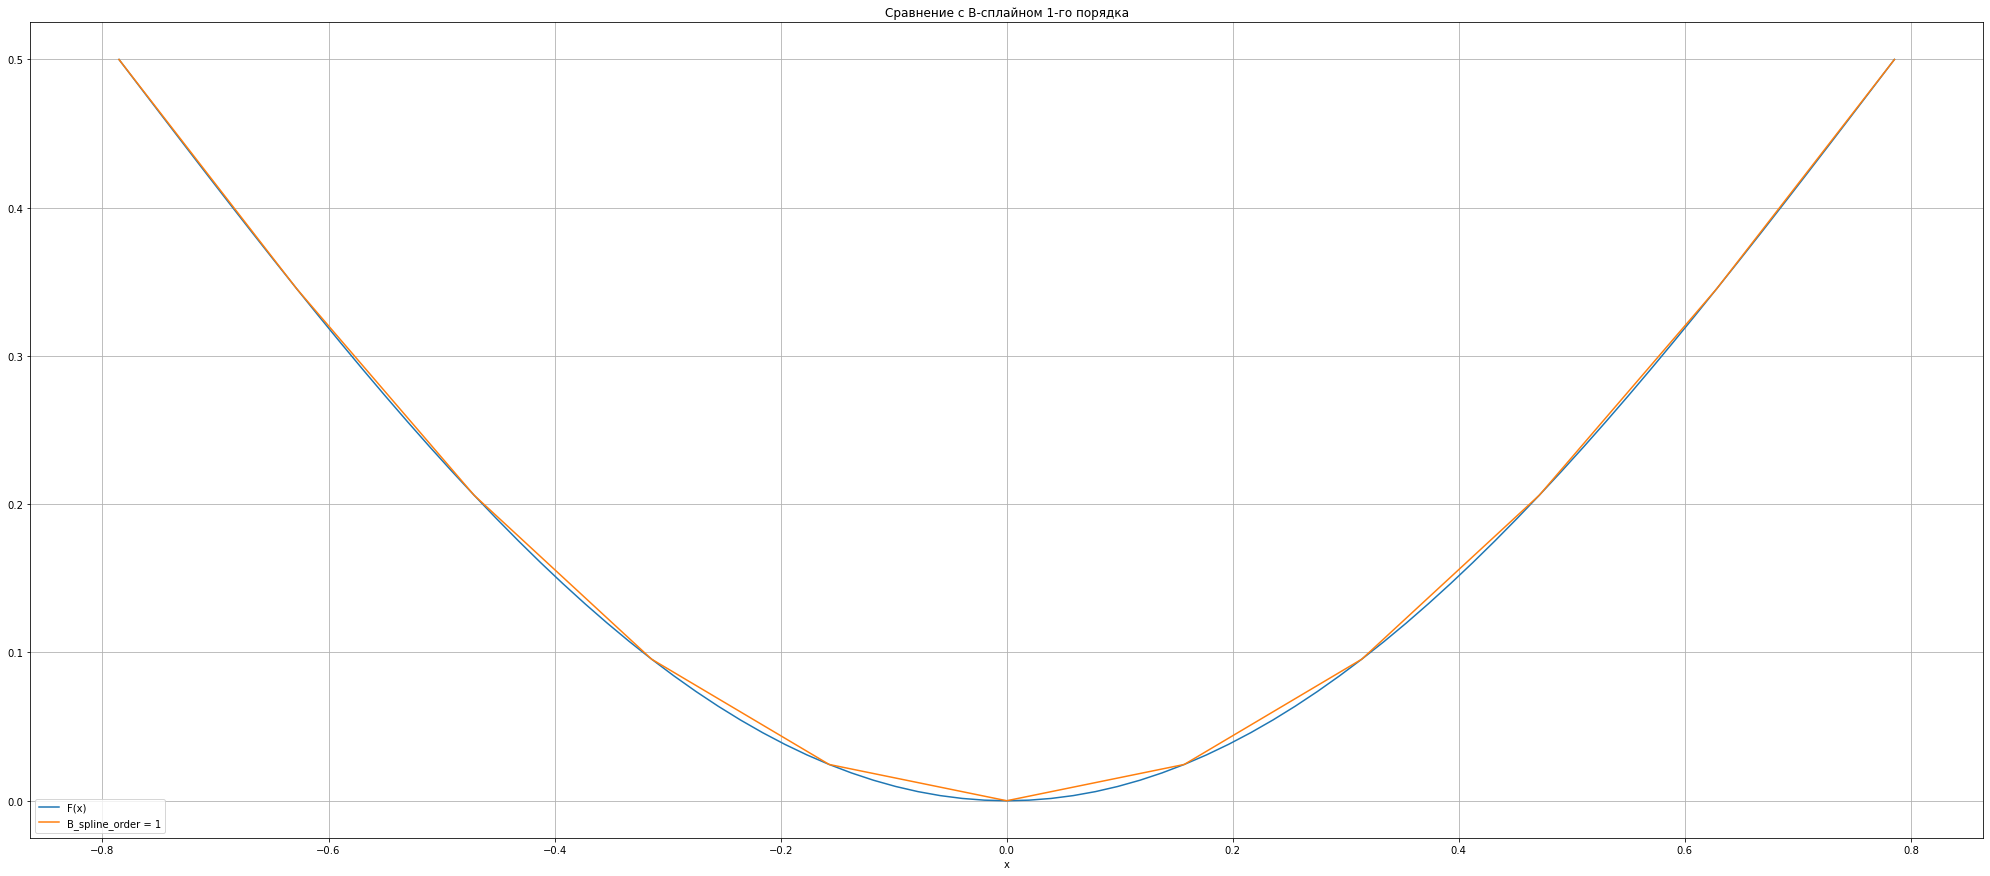

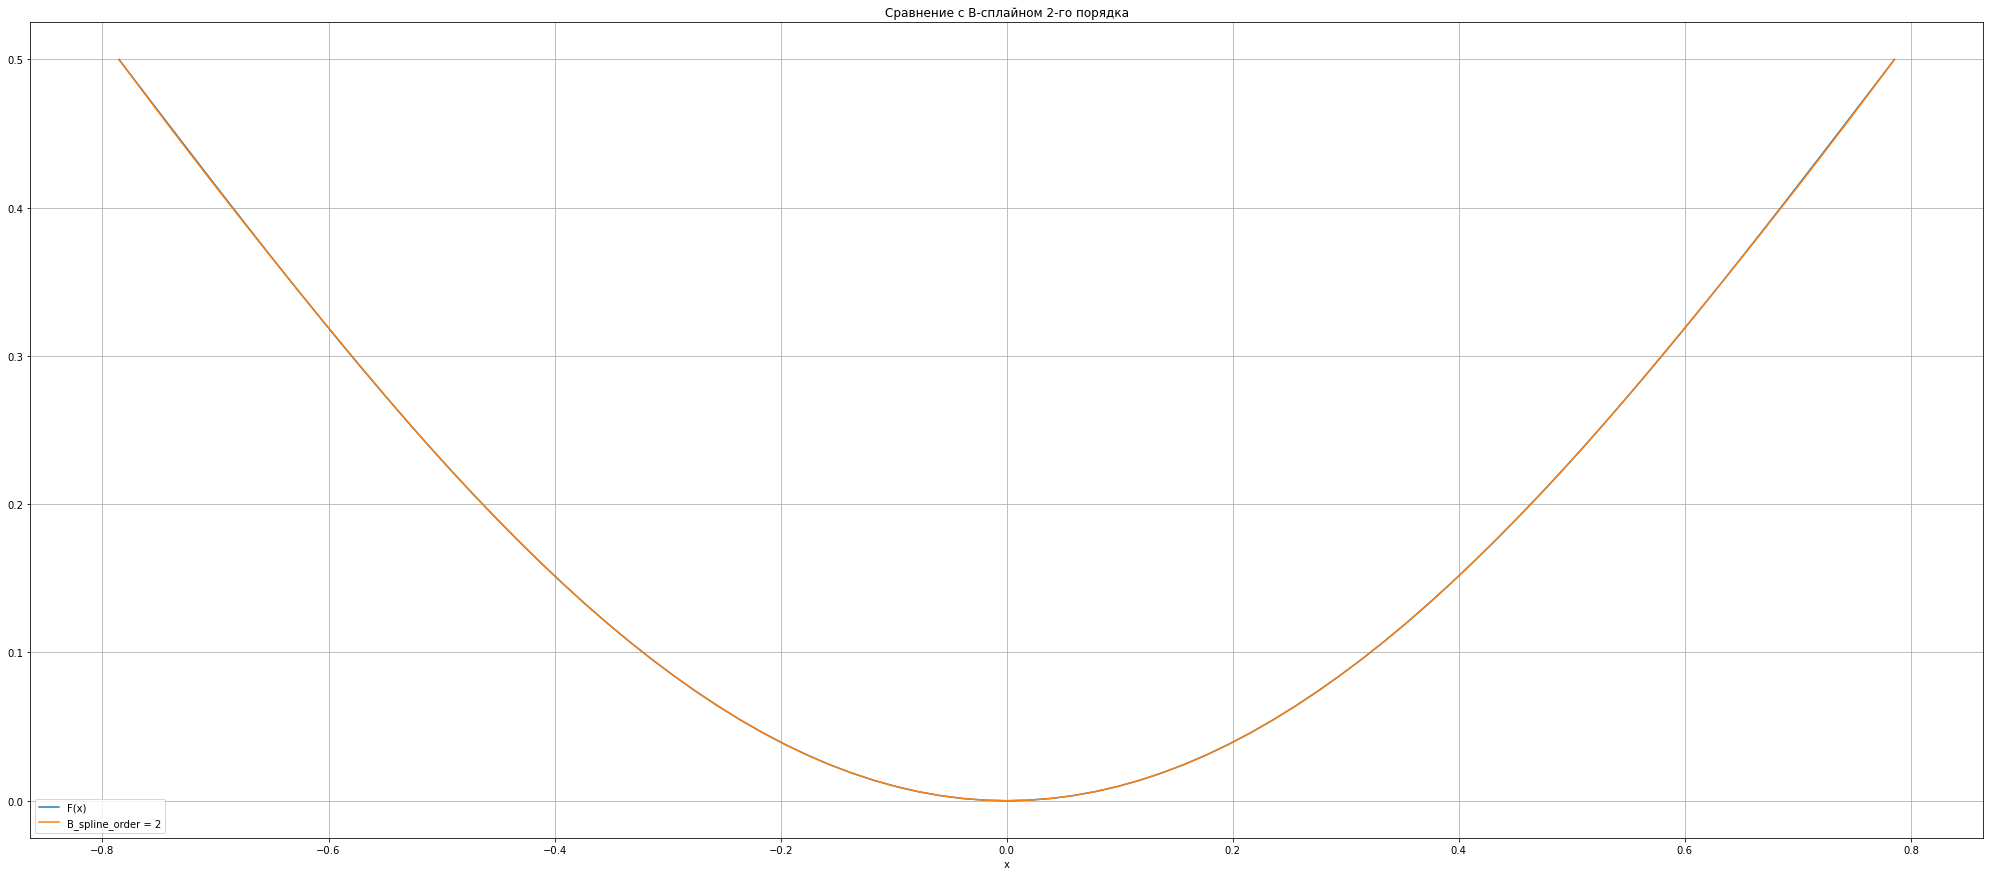

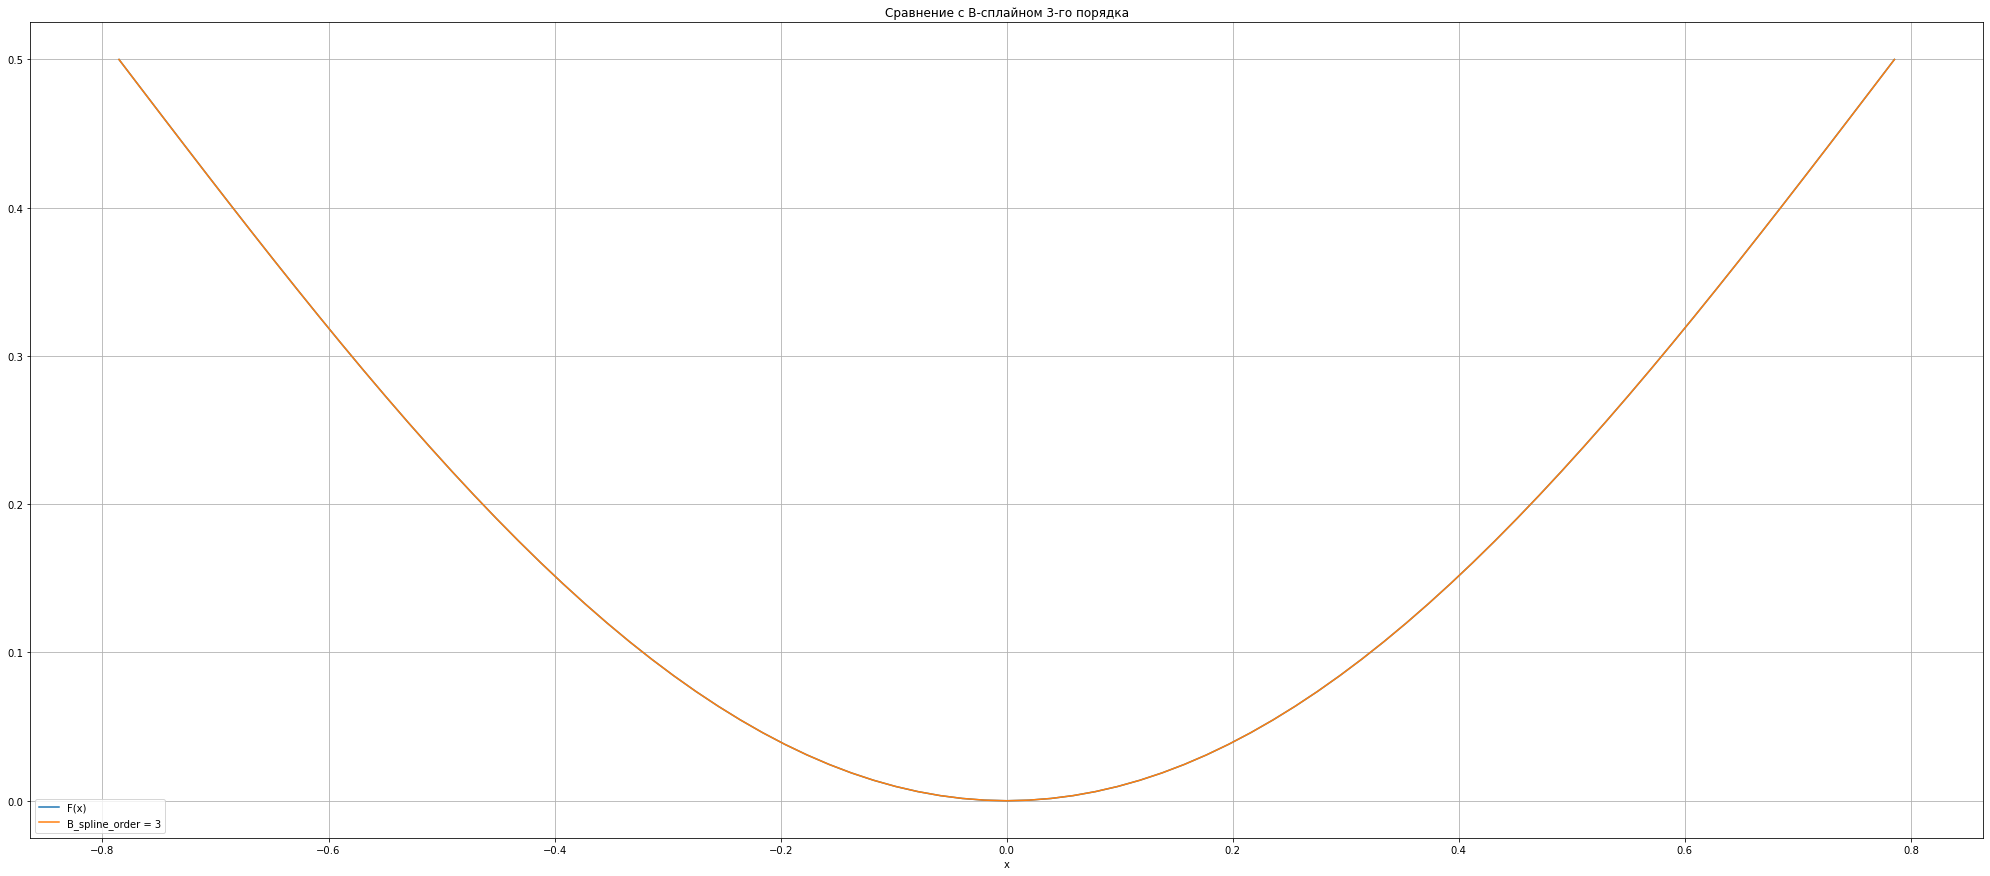

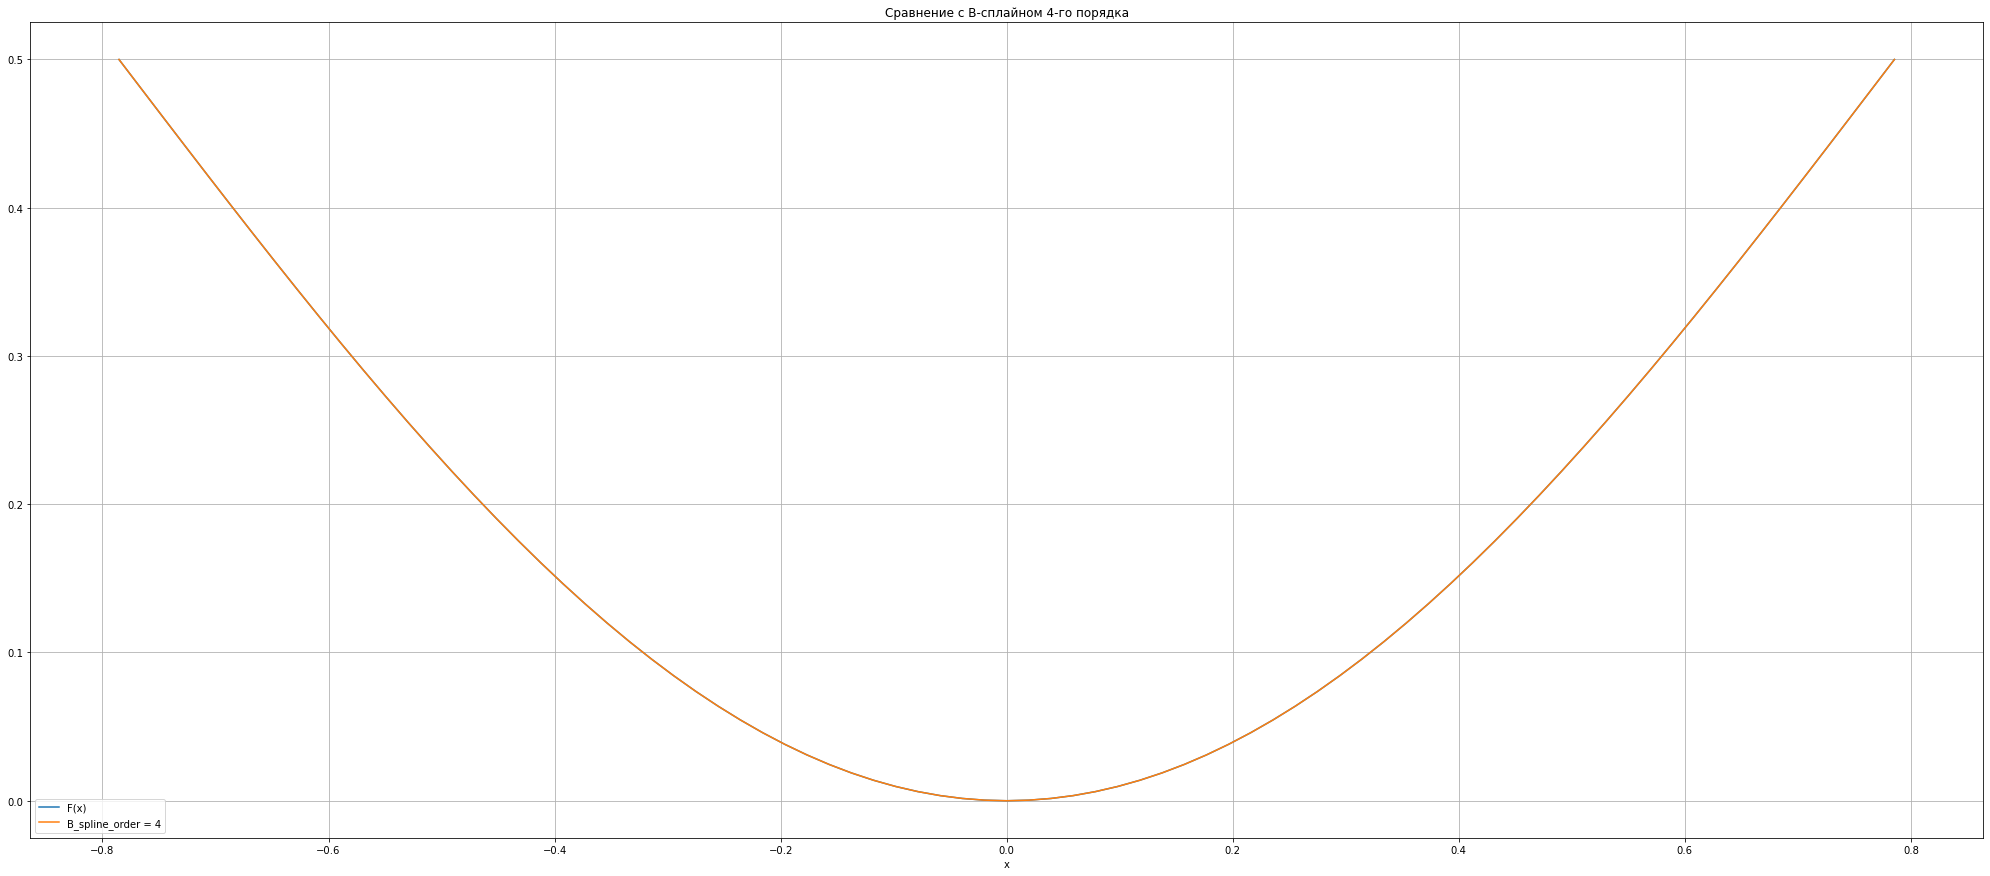

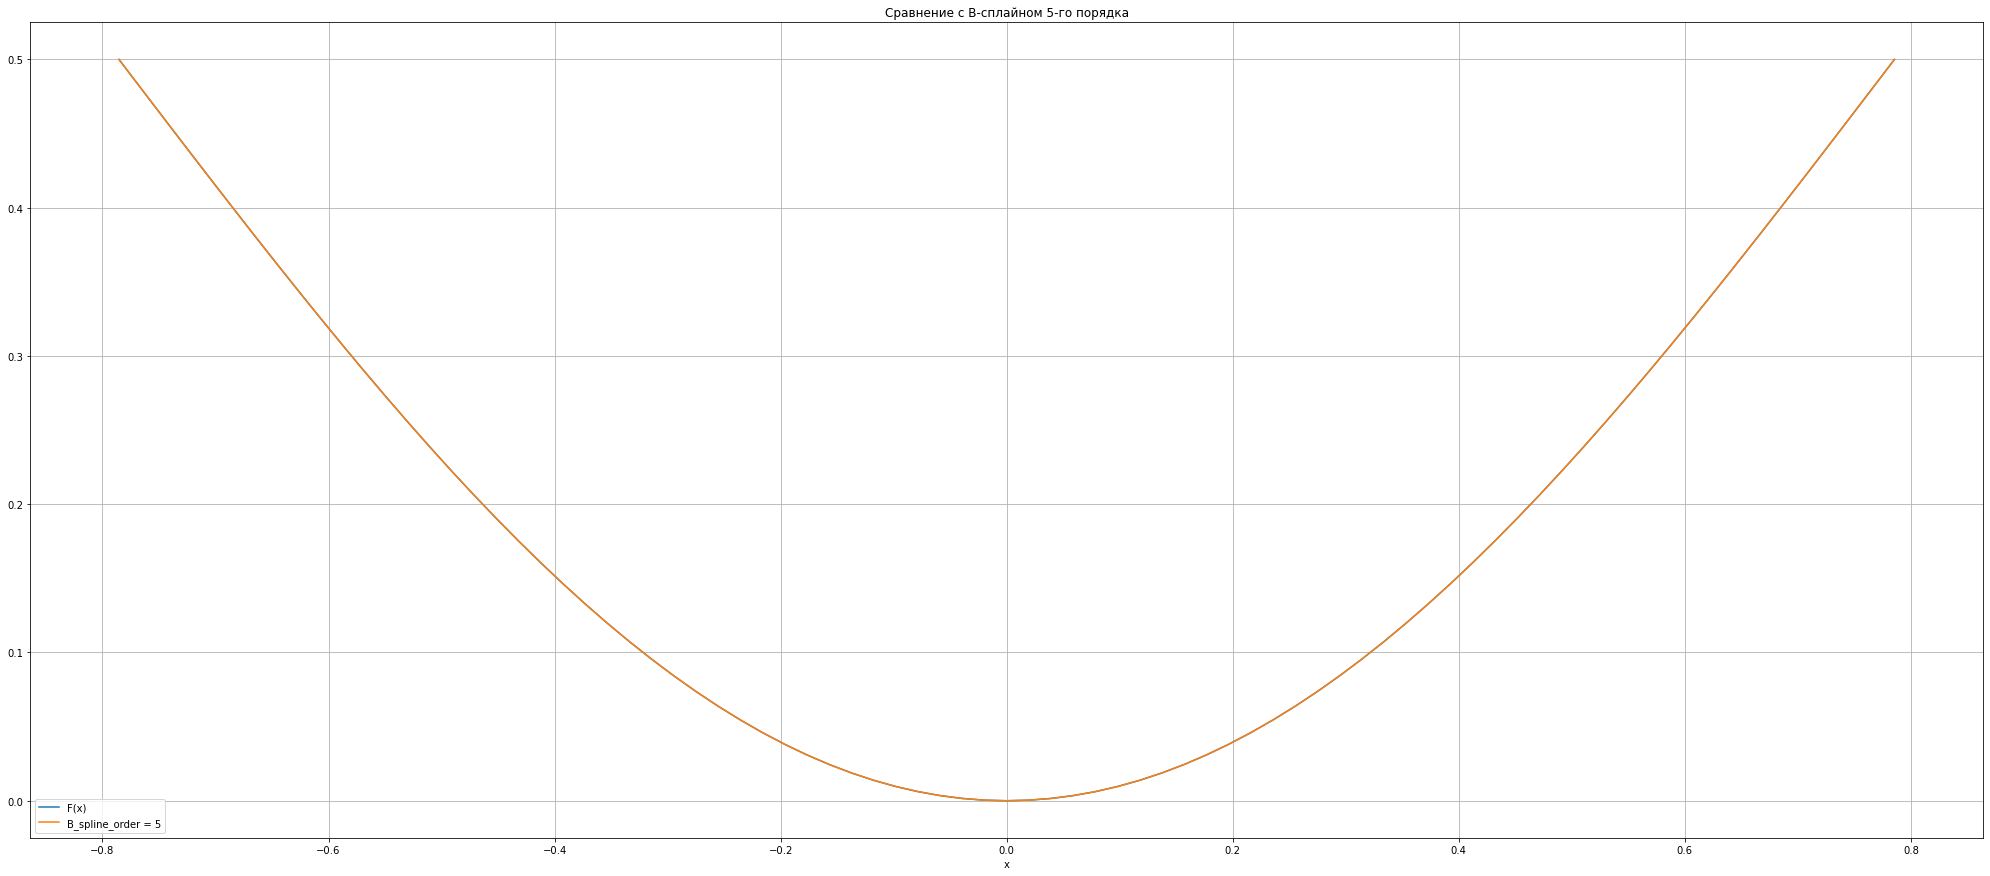

---------------------------------------------------------------------------------------------------------
Оценка погрешности аппроксимации функции в зависимости от степени сплайна. Попытка установить приближенную зависимость. Крайние условия плохо описываются.


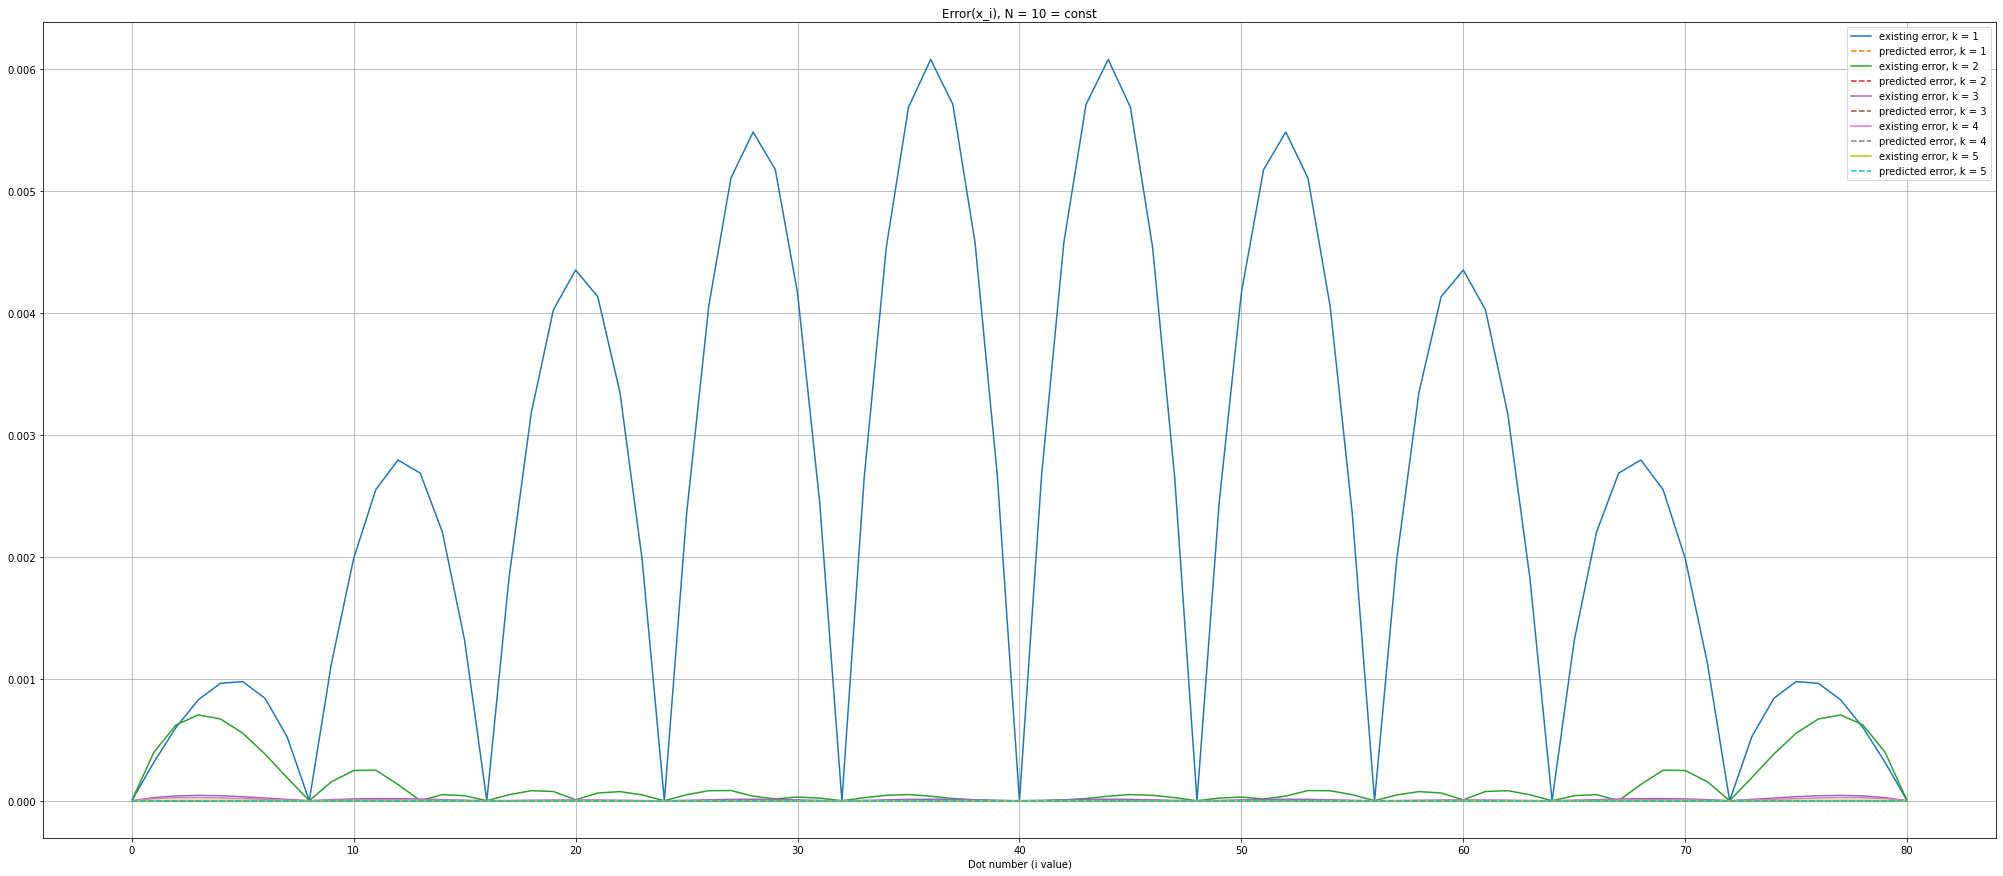

//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////


 					 Количество узлов интерполяции N =  20

Max error in B-spline (if order = 1 )	 = 0.0015365817177795562 	 i =  76
Max error in B-spline (if order = 2 )	 = 8.93016015650061e-05 	 i =  157
Max error in B-spline (if order = 3 )	 = 1.3860531446474589e-06 	 i =  3
Max error in B-spline (if order = 4 )	 = 8.760217073966459e-07 	 i =  3
Max error in B-spline (if order = 5 )	 = 2.86498252899392e-08 	 i =  157


,x,F(x),B_spline_order = 1,error_order = 1,B_spline_order = 2,error_order = 2,B_spline_order = 3,error_order = 3,B_spline_order = 4,error_order = 4,B_spline_order = 5,error_order = 5
0,-0.785398,0.500000,0.500000,0.000000e+00,5.000000e-01,5.551115e-17,5.000000e-01,0.000000e+00,5.000000e-01,5.551115e-17,5.000000e-01,5.551115e-17
1,-0.775581,0.490183,0.490223,3.969217e-05,4.901327e-01,5.048708e-05,4.901823e-01,8.176079e-07,4.901837e-01,5.738683e-07,4.901832e-01,1.938369e-08
2,-0.765763,0.480370,0.480446,7.559975e-05,4.802911e-01,7.899324e-05,4.803688e-01,1.253187e-06,4.803709e-01,8.344265e-07,4.803701e-01,2.773974e-08
3,-0.755946,0.470565,0.470669,1.039396e-04,4.704753e-01,8.930160e-05,4.705632e-01,1.386053e-06,4.705655e-01,8.760217e-07,4.705646e-01,2.864983e-08
4,-0.746128,0.460770,0.460891,1.209316e-04,4.606853e-01,8.519238e-05,4.607692e-01,1.292606e-06,4.607712e-01,7.760973e-07,4.607705e-01,2.495961e-08
5,-0.736311,0.450991,0.451114,1.227998e-04,4.509210e-01,7.044139e-05,4.509904e-01,1.044871e-06,4.509920e-01,5.966504e-07,4.509914e-01,1.886270e-08
6,-0.726493,0.441231,0.441337,1.057743e-04,4.411825e-01,4.881865e-05,4.412306e-01,7.090403e-07,4.412317e-01,3.856871e-07,4.412313e-01,1.198302e-08
7,-0.716676,0.431494,0.431560,6.609239e-05,4.314697e-01,2.408686e-05,4.314935e-01,3.440248e-07,4.314940e-01,1.786762e-07,4.314938e-01,5.454828e-09
8,-0.706858,0.421783,0.421783,5.551115e-17,4.217828e-01,5.551115e-17,4.217828e-01,1.110223e-16,4.217828e-01,0.000000e+00,4.217828e-01,5.551115e-17
9,-0.697041,0.412102,0.412246,1.444994e-04,4.121216e-01,1.969812e-05,4.121021e-01,2.830405e-07,4.121017e-01,1.355990e-07,4.121019e-01,3.998067e-09


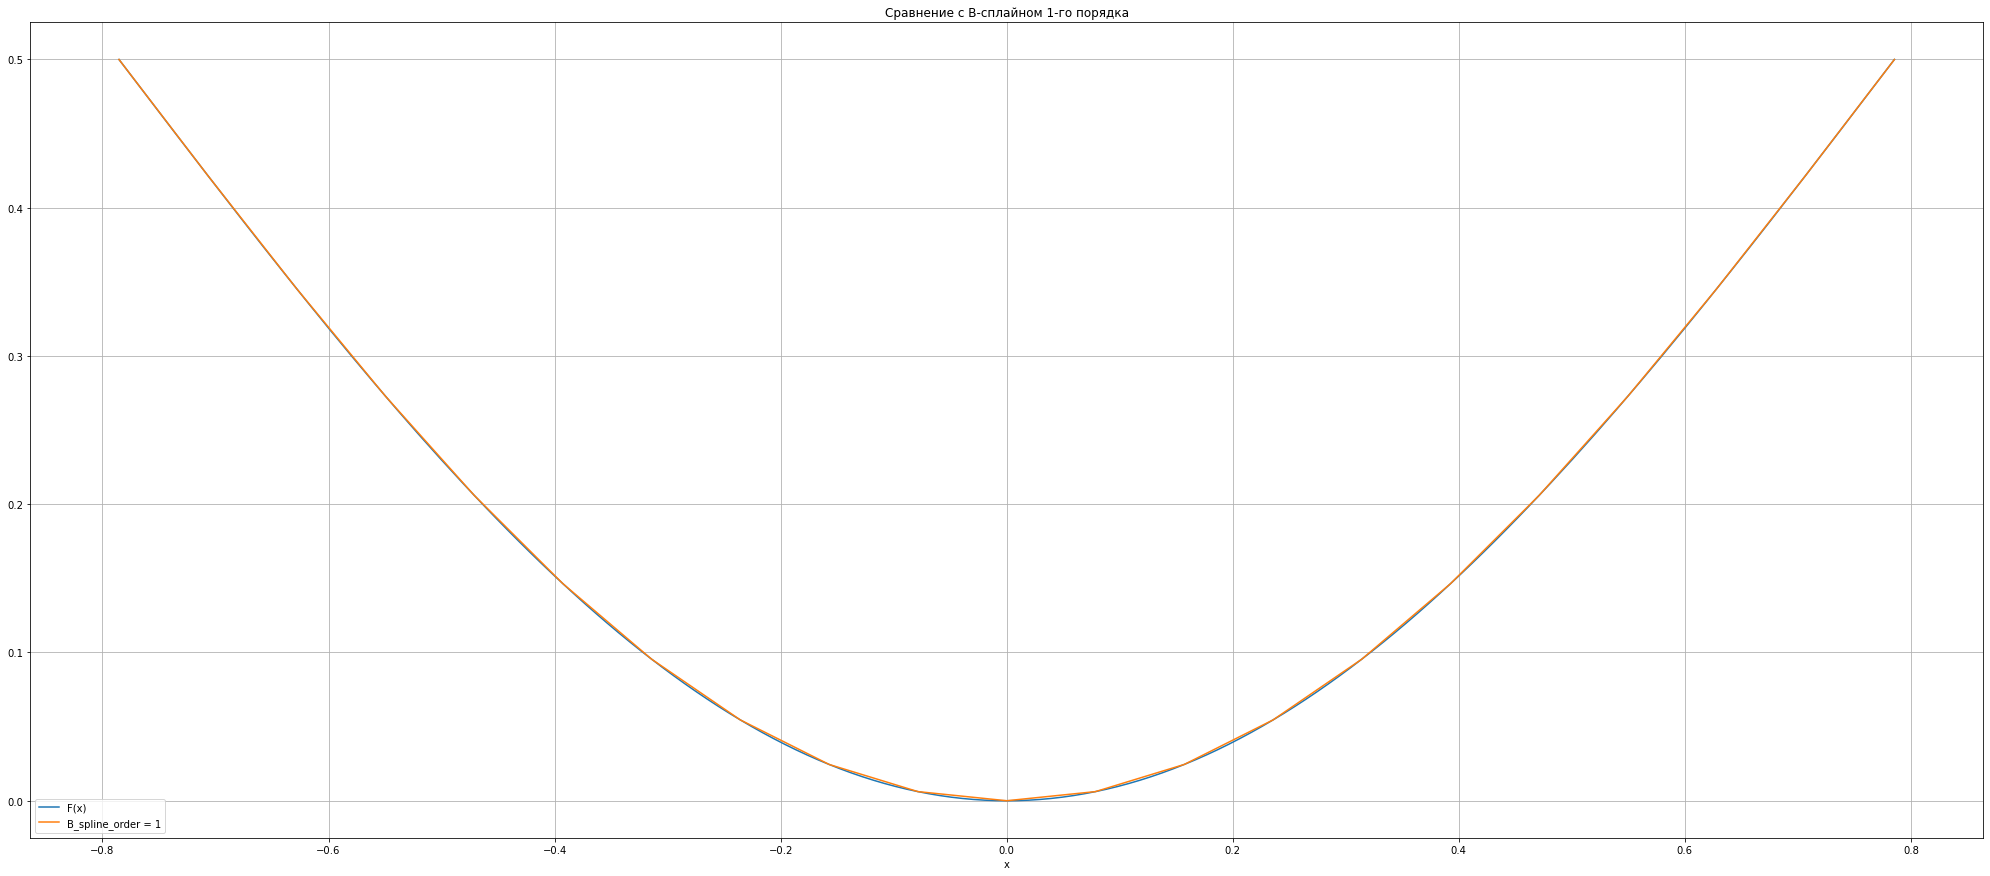

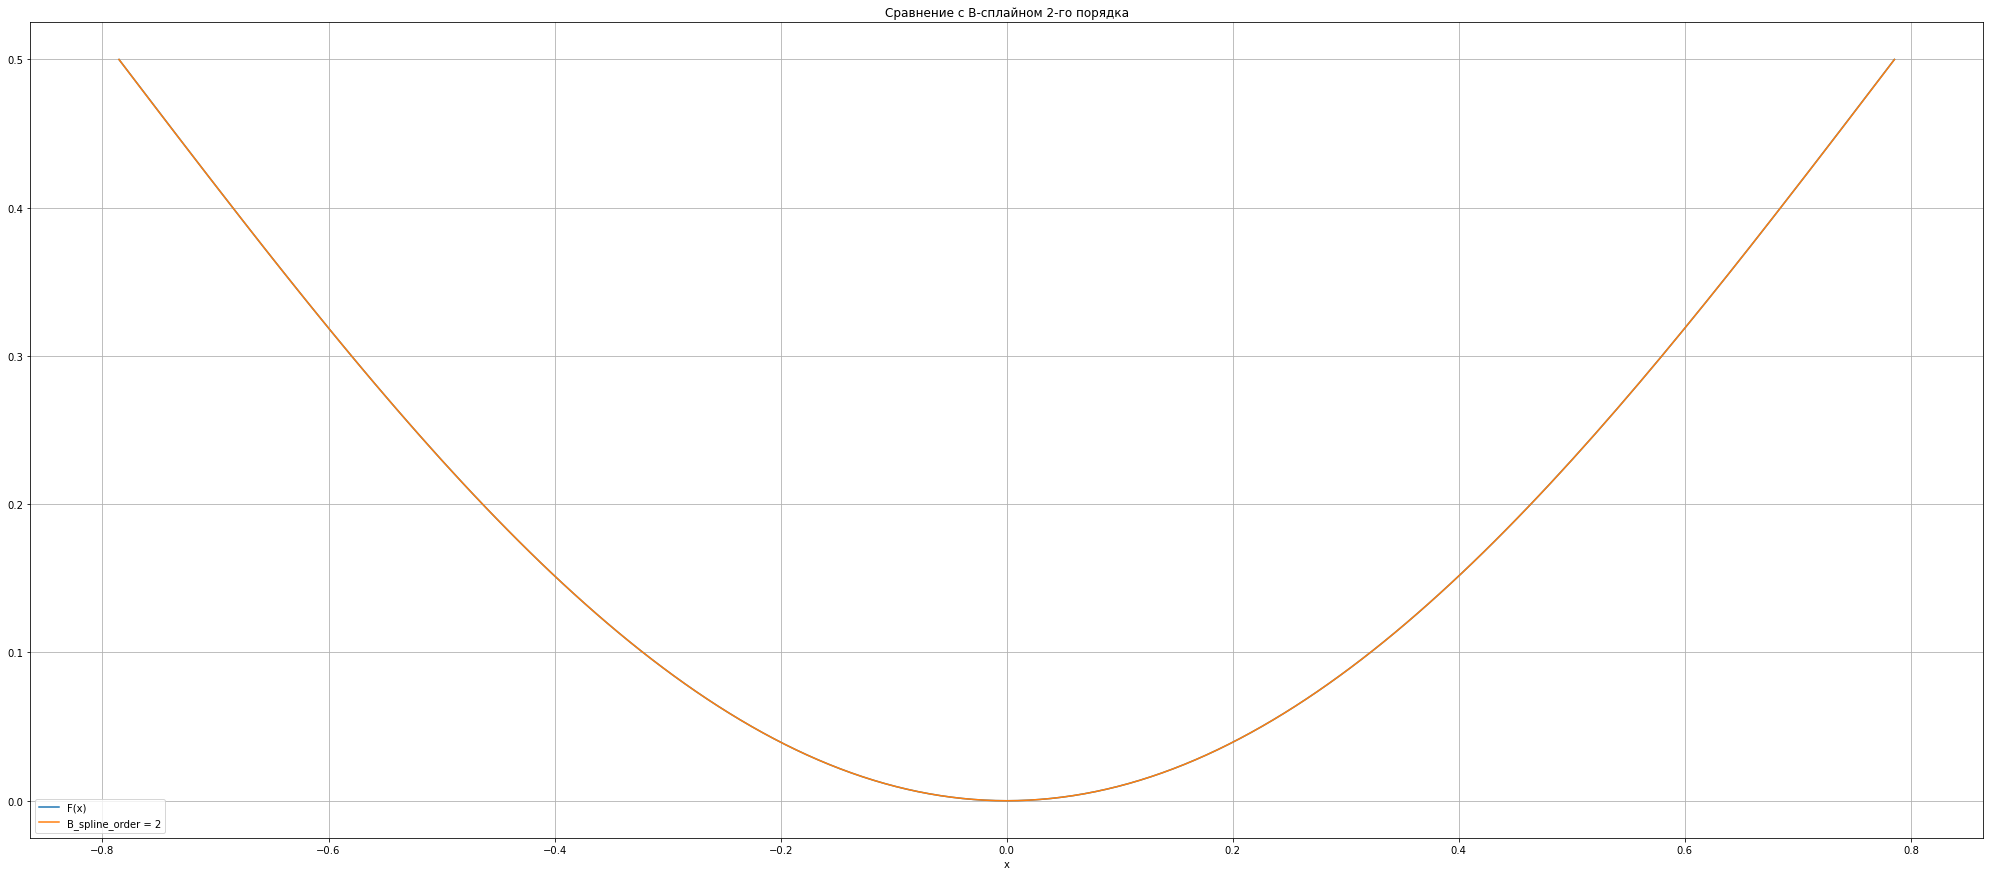

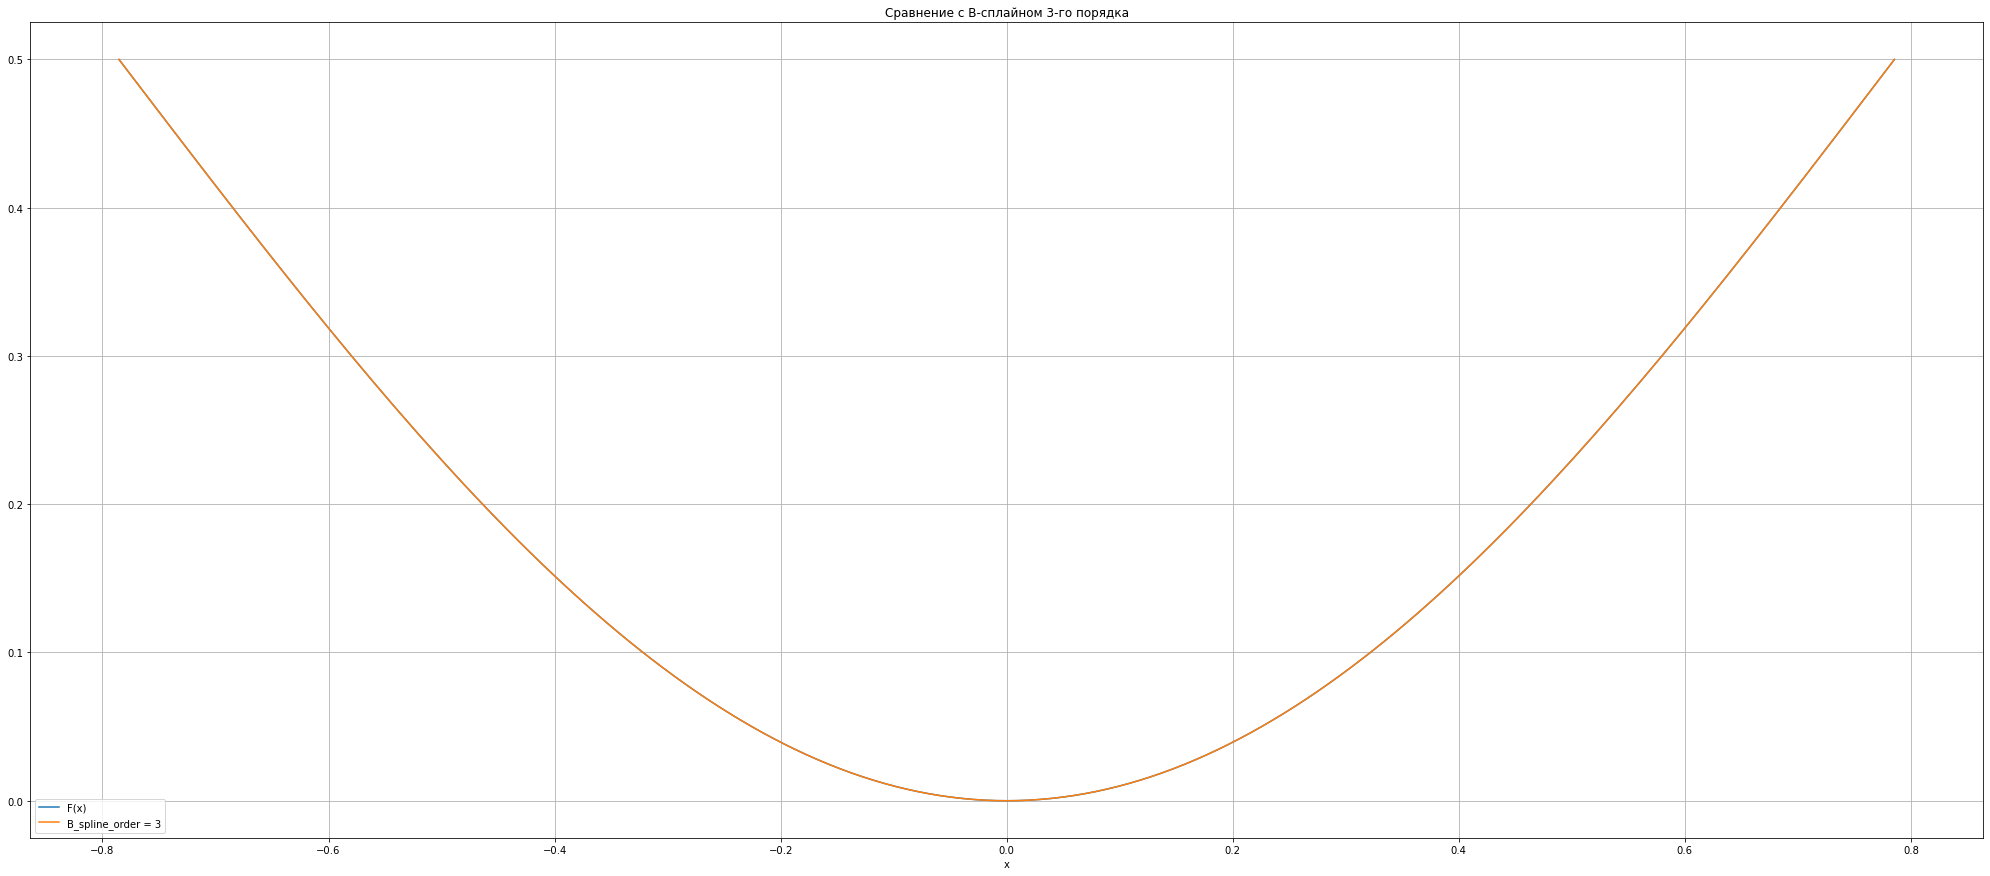

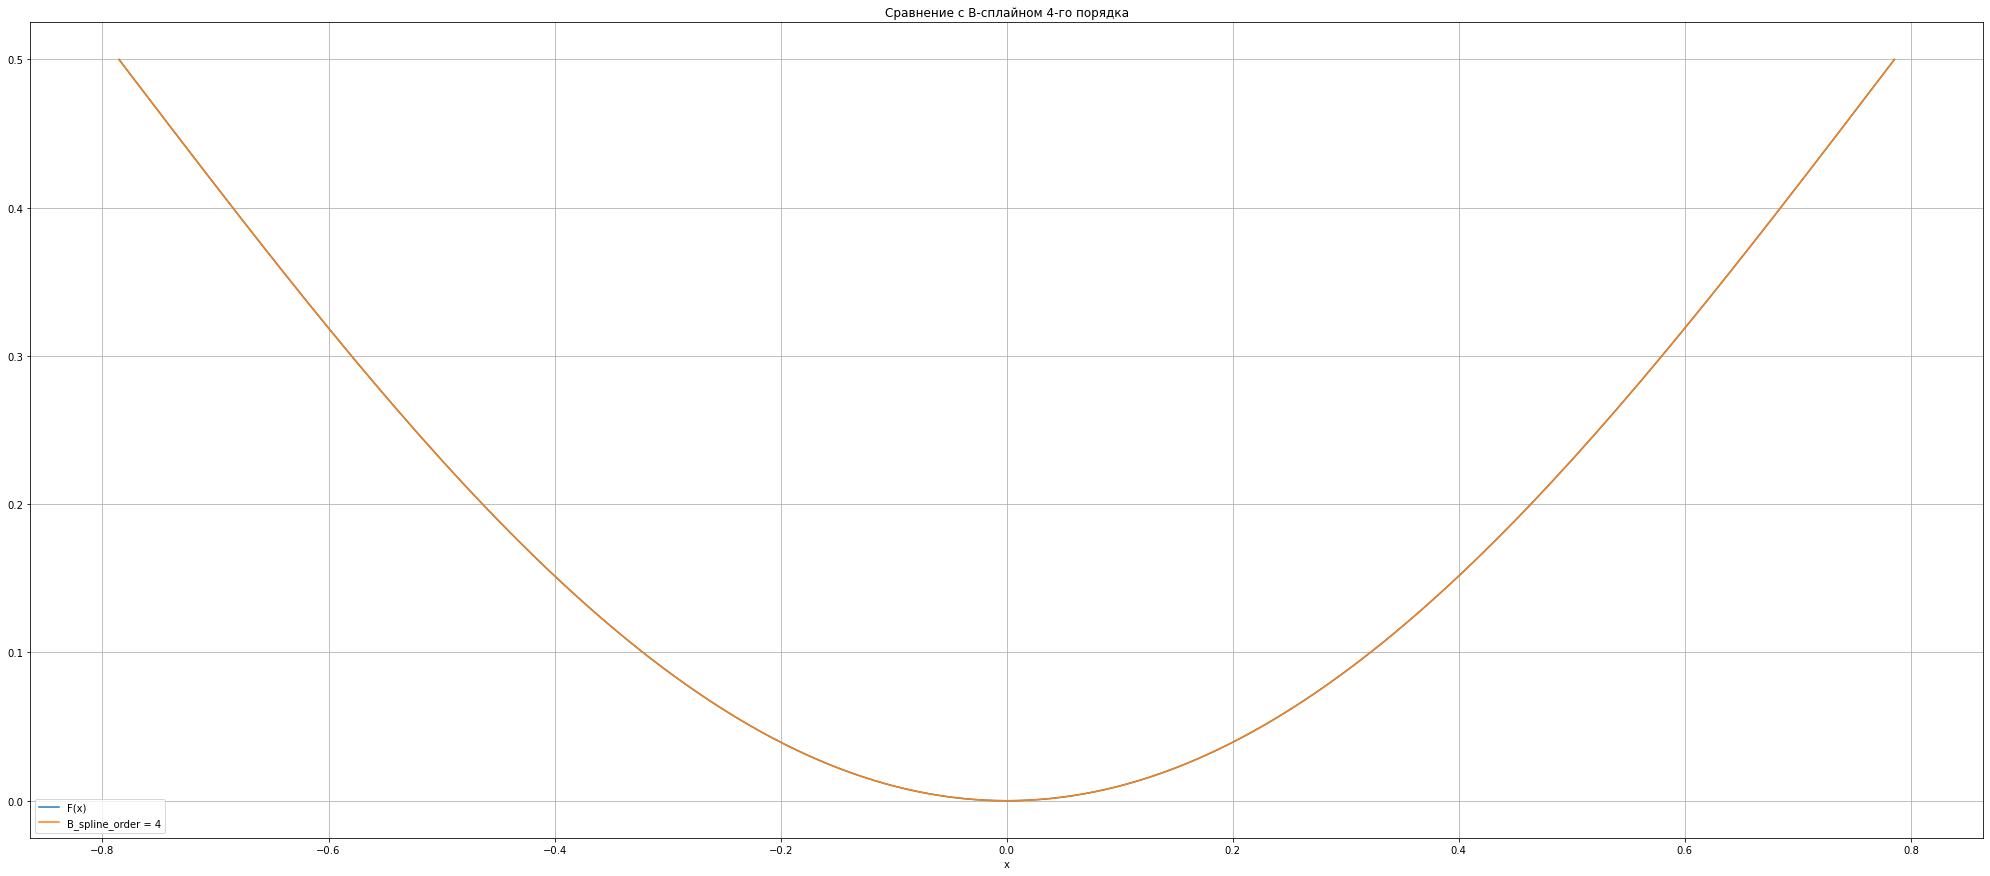

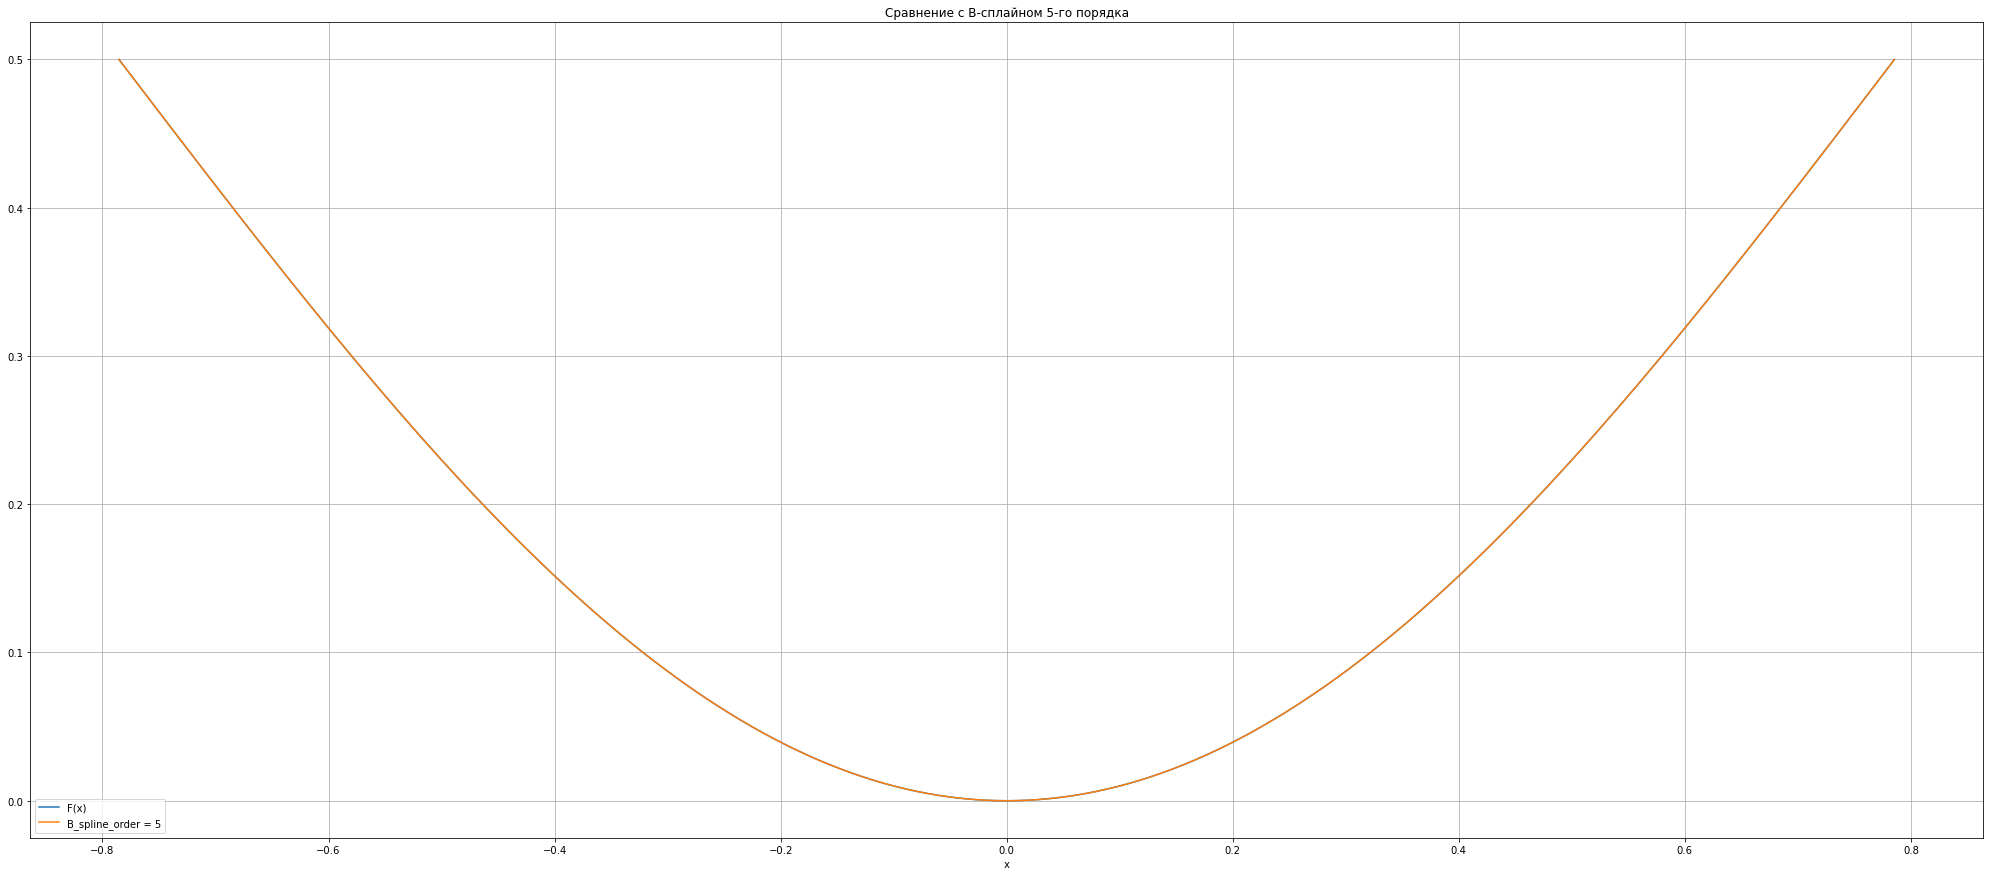

---------------------------------------------------------------------------------------------------------
Оценка погрешности аппроксимации функции в зависимости от степени сплайна. Попытка установить приближенную зависимость. Крайние условия плохо описываются.


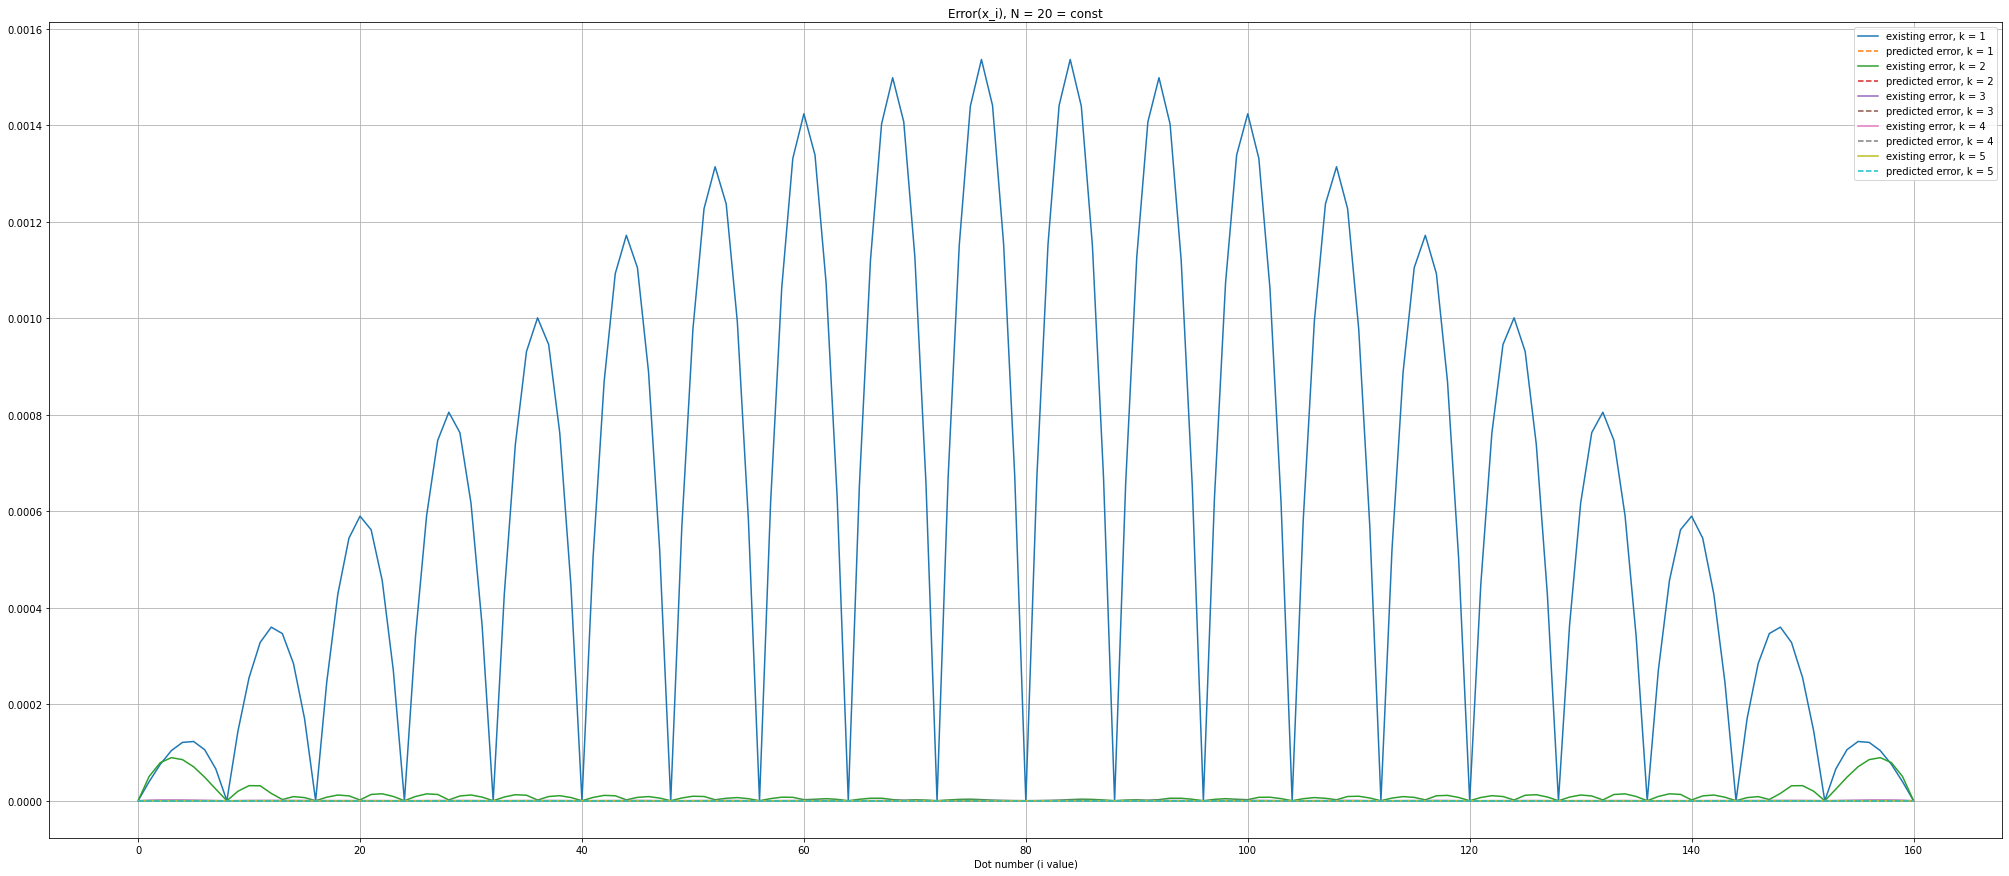

//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////


 					 Количество узлов интерполяции N =  40

Max error in B-spline (if order = 1 )	 = 0.00038518468707947345 	 i =  156
Max error in B-spline (if order = 2 )	 = 1.1205041696438212e-05 	 i =  3
Max error in B-spline (if order = 3 )	 = 4.9583013030064186e-08 	 i =  156
Max error in B-spline (if order = 4 )	 = 2.7921179812651076e-08 	 i =  3
Max error in B-spline (if order = 5 )	 = 2.2642104857695244e-10 	 i =  3


,x,F(x),B_spline_order = 1,error_order = 1,B_spline_order = 2,error_order = 2,B_spline_order = 3,error_order = 3,B_spline_order = 4,error_order = 4,B_spline_order = 5,error_order = 5
0,-0.785398,0.500000,0.500000,0.000000e+00,0.500000,5.551115e-17,5.000000e-01,0.000000e+00,5.000000e-01,5.551115e-17,5.000000e-01,5.551115e-17
1,-0.780489,0.495091,0.495096,4.966186e-06,0.495085,6.332382e-06,4.950913e-01,2.563463e-08,4.950914e-01,1.827696e-08,4.950913e-01,1.531609e-10
2,-0.775581,0.490183,0.490193,9.459264e-06,0.490173,9.909709e-06,4.901831e-01,3.929307e-08,4.901832e-01,2.658540e-08,4.901832e-01,2.192074e-10
3,-0.770672,0.485276,0.485289,1.300618e-05,0.485265,1.120504e-05,4.852759e-01,4.346087e-08,4.852759e-01,2.792118e-08,4.852759e-01,2.264210e-10
4,-0.765763,0.480370,0.480385,1.513395e-05,0.480359,1.069135e-05,4.803701e-01,4.053245e-08,4.803701e-01,2.474561e-08,4.803701e-01,1.972763e-10
5,-0.760854,0.475466,0.475482,1.536975e-05,0.475457,8.841468e-06,4.754661e-01,3.276540e-08,4.754662e-01,1.903107e-08,4.754662e-01,1.491022e-10
6,-0.755946,0.470565,0.470578,1.324093e-05,0.470558,6.128046e-06,4.705646e-01,2.223498e-08,4.705646e-01,1.230655e-08,4.705646e-01,9.473022e-11
7,-0.751037,0.465666,0.465674,8.275061e-06,0.465663,3.023507e-06,4.656659e-01,1.078855e-08,4.656659e-01,5.703226e-09,4.656659e-01,4.312667e-11
8,-0.746128,0.460770,0.460770,5.551115e-17,0.460770,5.551115e-17,4.607705e-01,5.551115e-17,4.607705e-01,5.551115e-17,4.607705e-01,1.665335e-16
9,-0.741220,0.455879,0.455897,1.817681e-05,0.455881,2.470643e-06,4.558788e-01,8.875693e-09,4.558788e-01,4.331018e-09,4.558788e-01,3.161543e-11


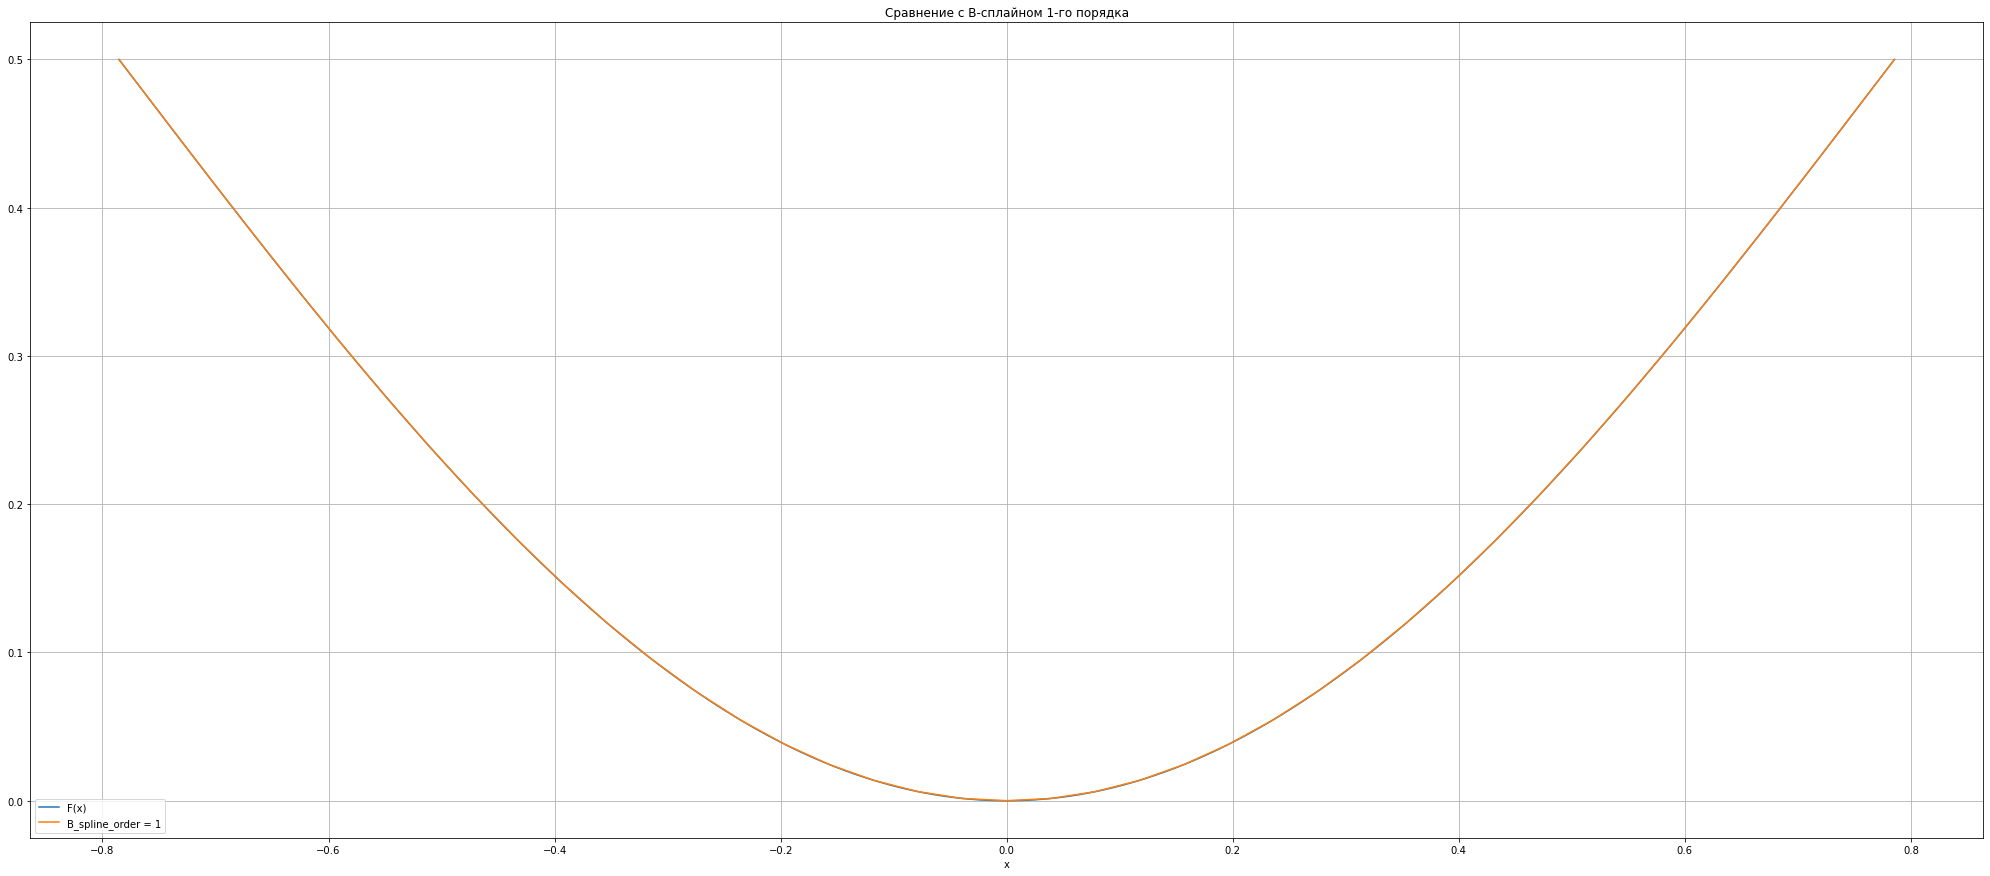

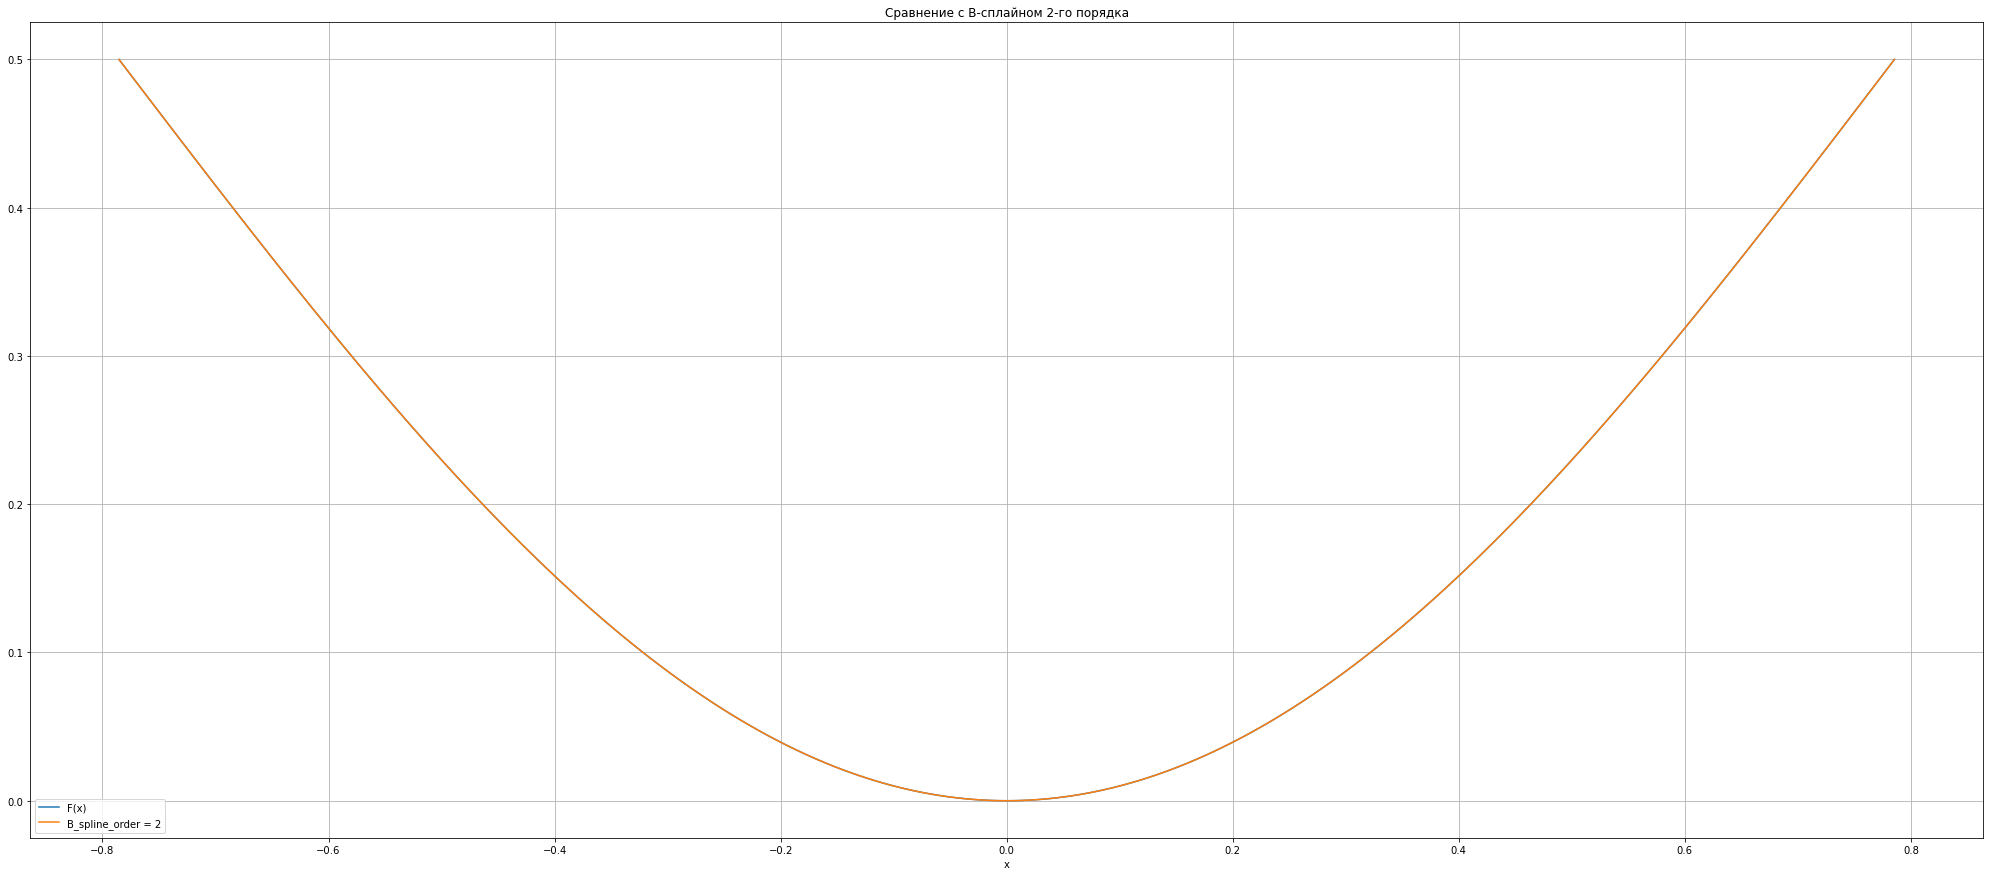

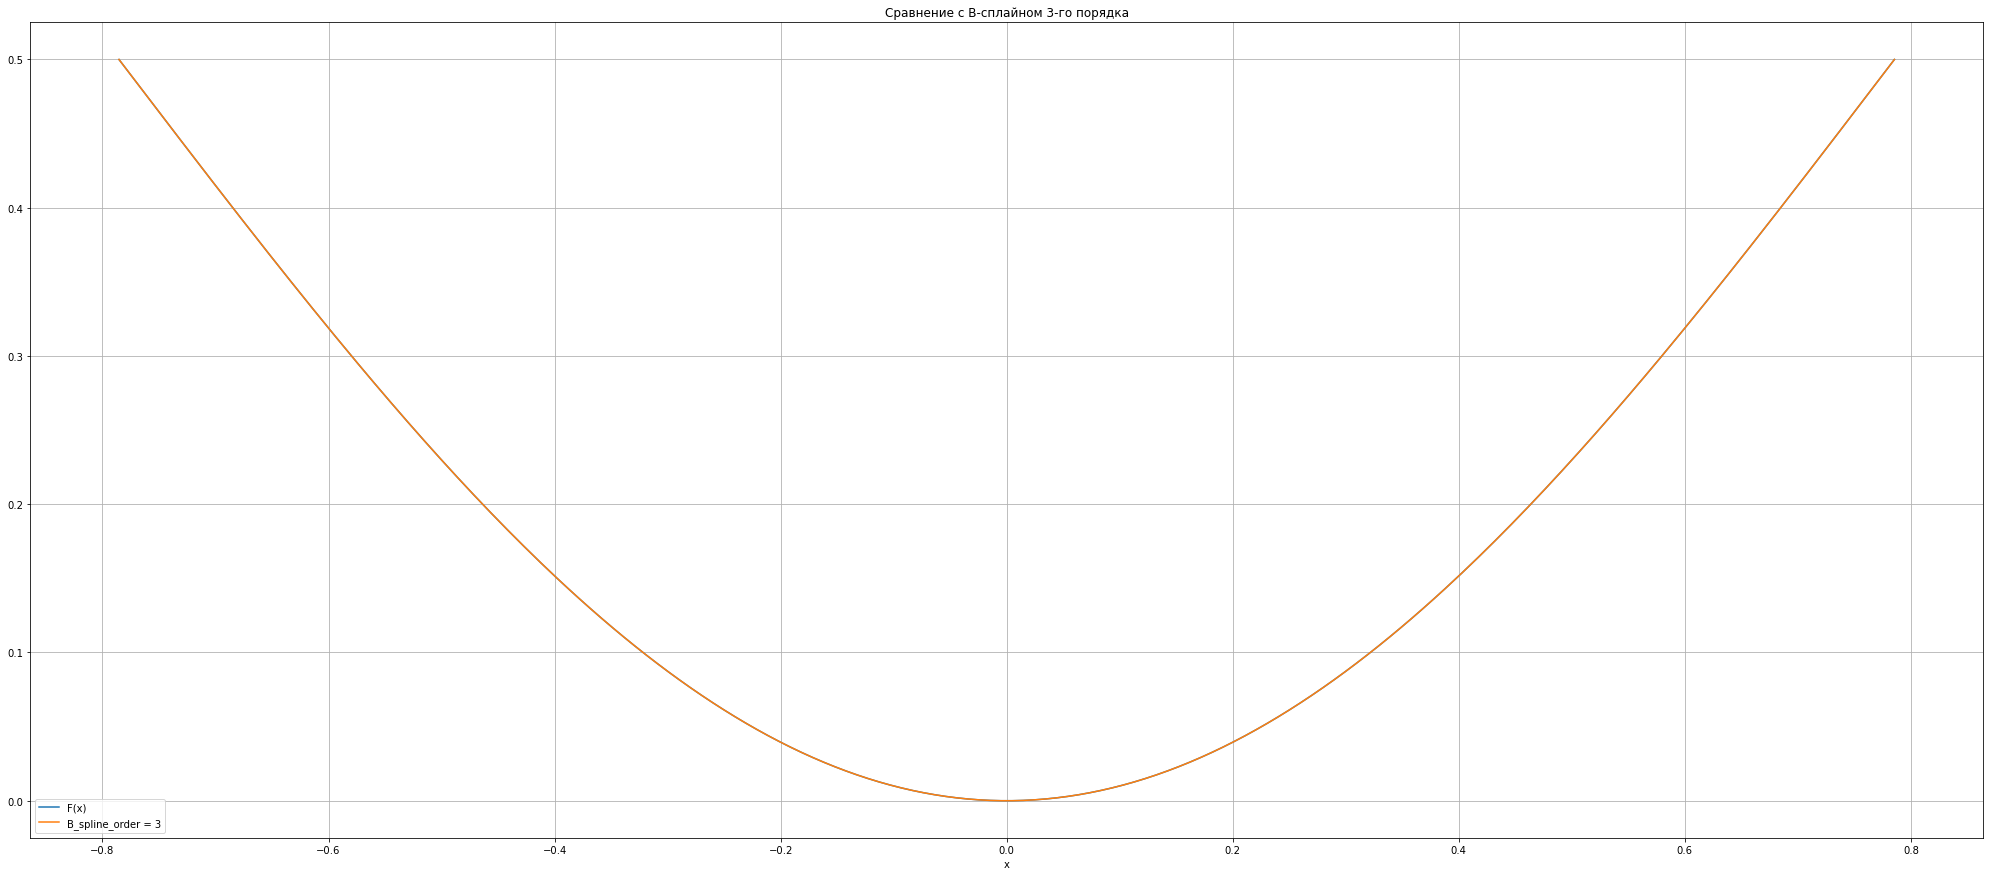

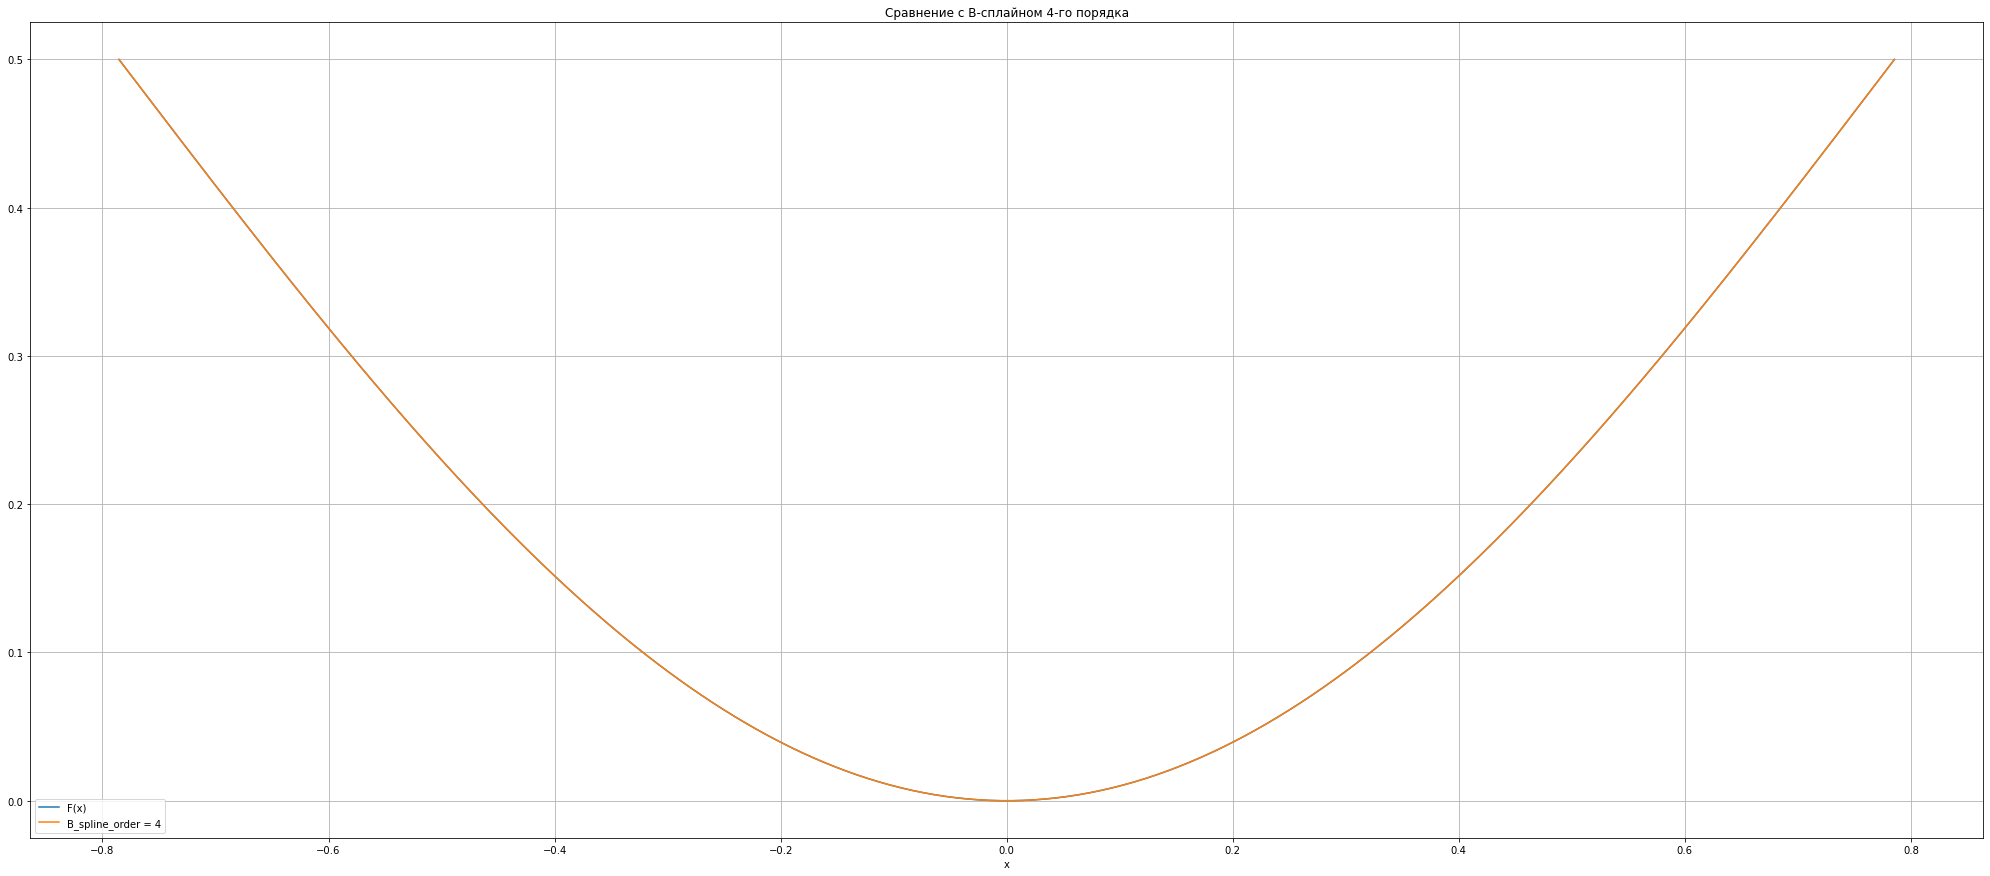

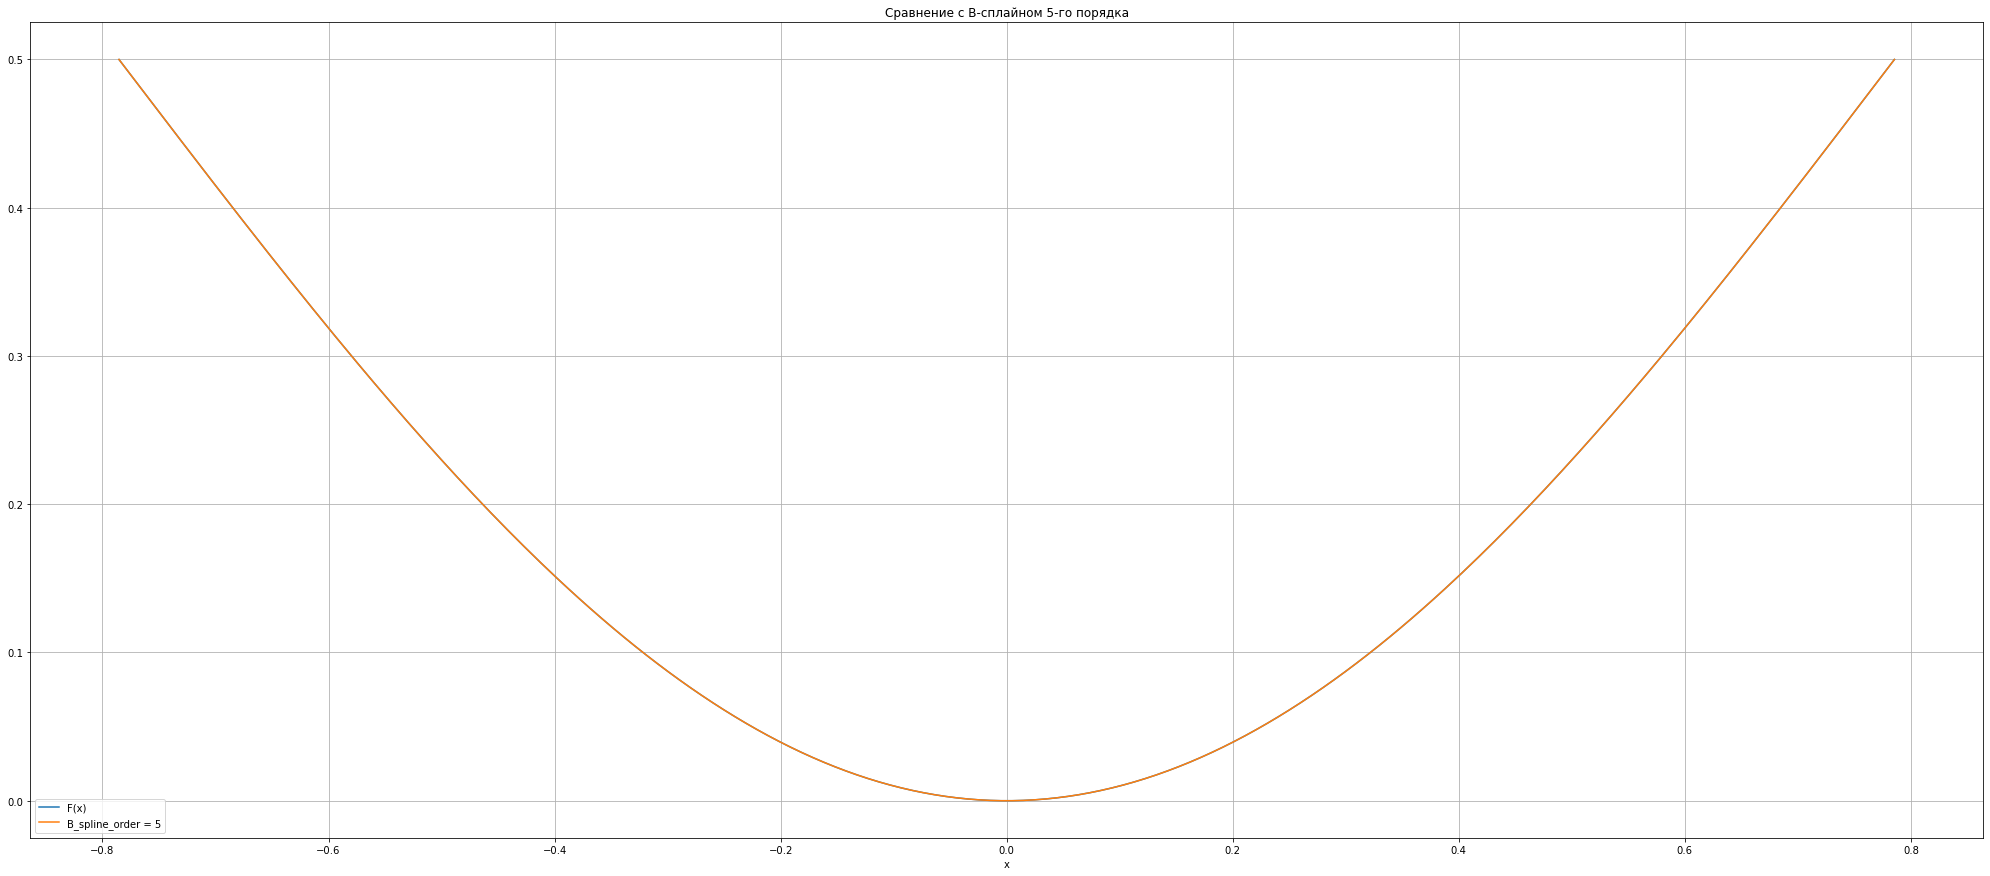

---------------------------------------------------------------------------------------------------------
Оценка погрешности аппроксимации функции в зависимости от степени сплайна. Попытка установить приближенную зависимость. Крайние условия плохо описываются.


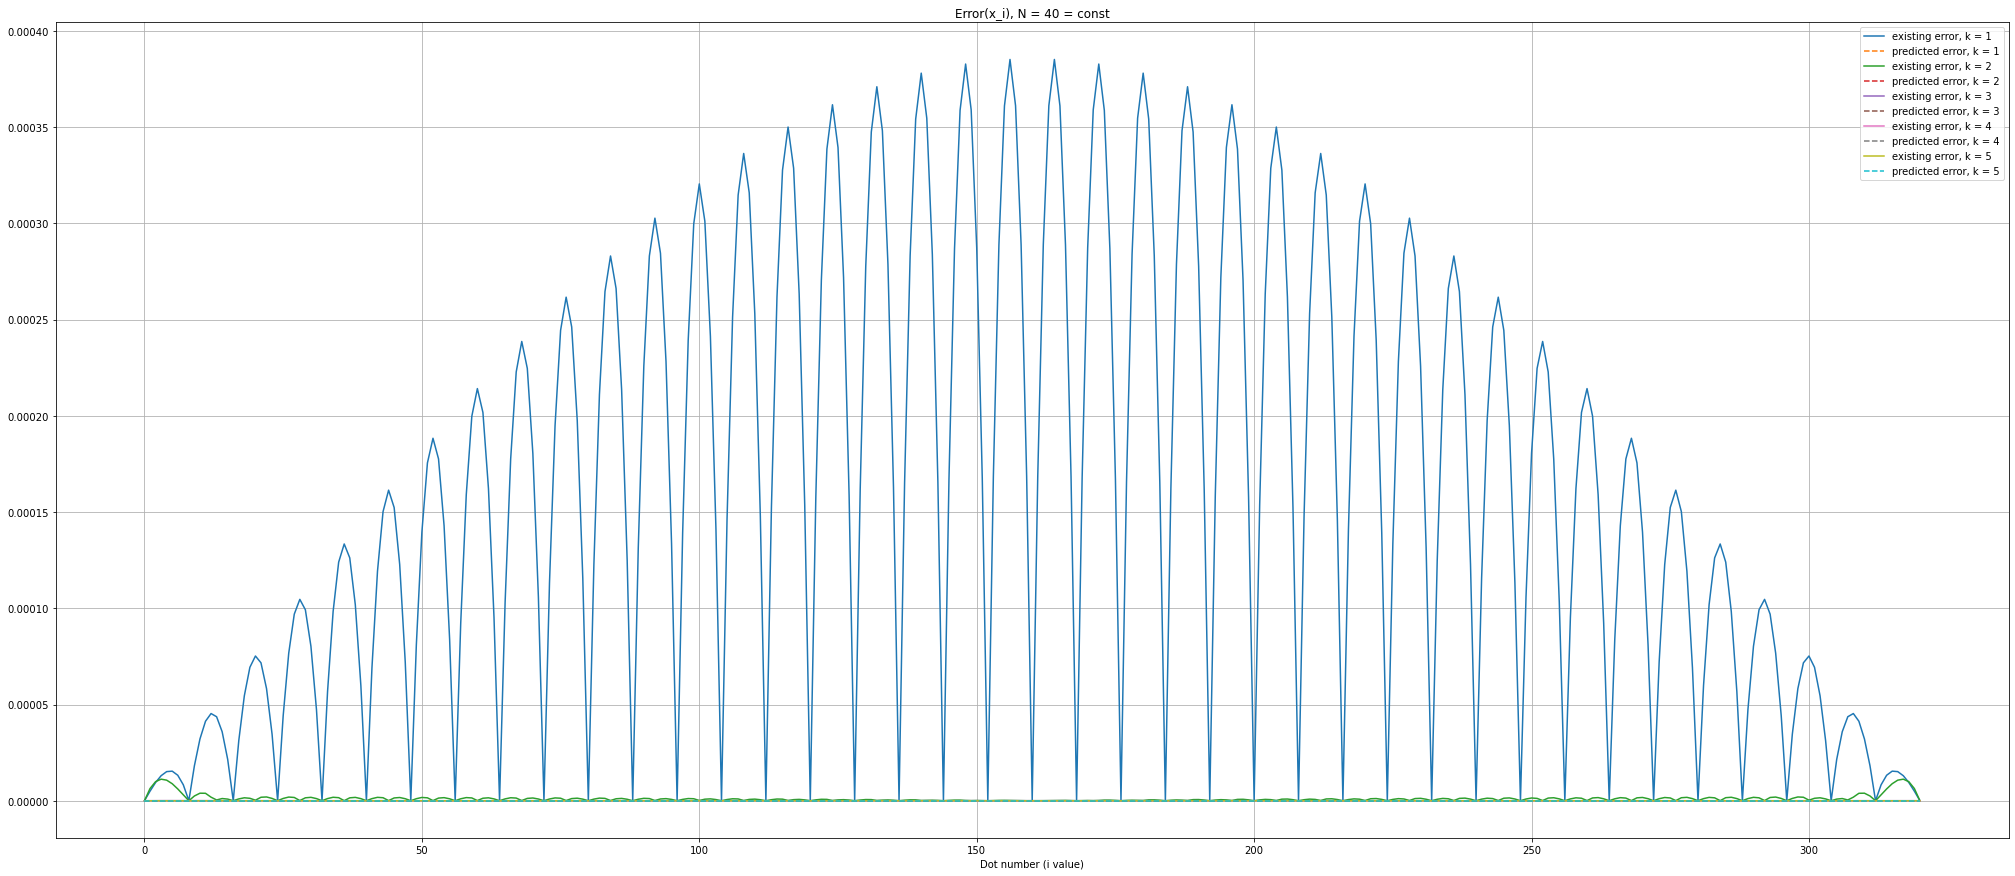

//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////


 					 Количество узлов интерполяции N =  80

Max error in B-spline (if order = 1 )	 = 9.636118085169451e-05 	 i =  316
Max error in B-spline (if order = 2 )	 = 1.401952807233986e-06 	 i =  637
Max error in B-spline (if order = 3 )	 = 3.097148460872584e-09 	 i =  316
Max error in B-spline (if order = 4 )	 = 8.768172854445311e-10 	 i =  3
Max error in B-spline (if order = 5 )	 = 1.7742474156534627e-12 	 i =  3


,x,F(x),B_spline_order = 1,error_order = 1,B_spline_order = 2,error_order = 2,B_spline_order = 3,error_order = 3,B_spline_order = 4,error_order = 4,B_spline_order = 5,error_order = 5
0,-0.785398,0.500000,0.500000,0.000000e+00,0.500000,5.551115e-17,0.500000,0.000000e+00,5.000000e-01,5.551115e-17,5.000000e-01,5.551115e-17
1,-0.782944,0.497546,0.497546,6.209191e-07,0.497545,7.922193e-07,0.497546,8.017424e-10,4.975456e-01,5.738507e-10,4.975456e-01,1.199985e-12
2,-0.780489,0.495091,0.495093,1.182699e-06,0.495090,1.239824e-06,0.495091,1.228932e-09,4.950913e-01,8.347922e-10,4.950913e-01,1.717571e-12
3,-0.778035,0.492637,0.492639,1.626201e-06,0.492636,1.401953e-06,0.492637,1.359299e-09,4.926372e-01,8.768173e-10,4.926372e-01,1.774247e-12
4,-0.775581,0.490183,0.490185,1.892291e-06,0.490182,1.337740e-06,0.490183,1.267722e-09,4.901832e-01,7.771654e-10,4.901832e-01,1.545875e-12
5,-0.773126,0.487729,0.487731,1.921837e-06,0.487728,1.106317e-06,0.487729,1.024804e-09,4.877294e-01,5.977477e-10,4.877294e-01,1.168232e-12
6,-0.770672,0.485276,0.485278,1.655714e-06,0.485275,7.668086e-07,0.485276,6.954488e-10,4.852759e-01,3.865714e-10,4.852759e-01,7.422396e-13
7,-0.768218,0.482823,0.482824,1.034805e-06,0.482822,3.783331e-07,0.482823,3.374372e-10,4.828228e-01,1.791642e-10,4.828228e-01,3.379519e-13
8,-0.765763,0.480370,0.480370,0.000000e+00,0.480370,5.551115e-17,0.480370,5.551115e-17,4.803701e-01,5.551115e-17,4.803701e-01,0.000000e+00
9,-0.763309,0.477918,0.477920,2.275686e-06,0.477918,3.090913e-07,0.477918,2.776053e-10,4.779179e-01,1.360784e-10,4.779179e-01,2.478018e-13


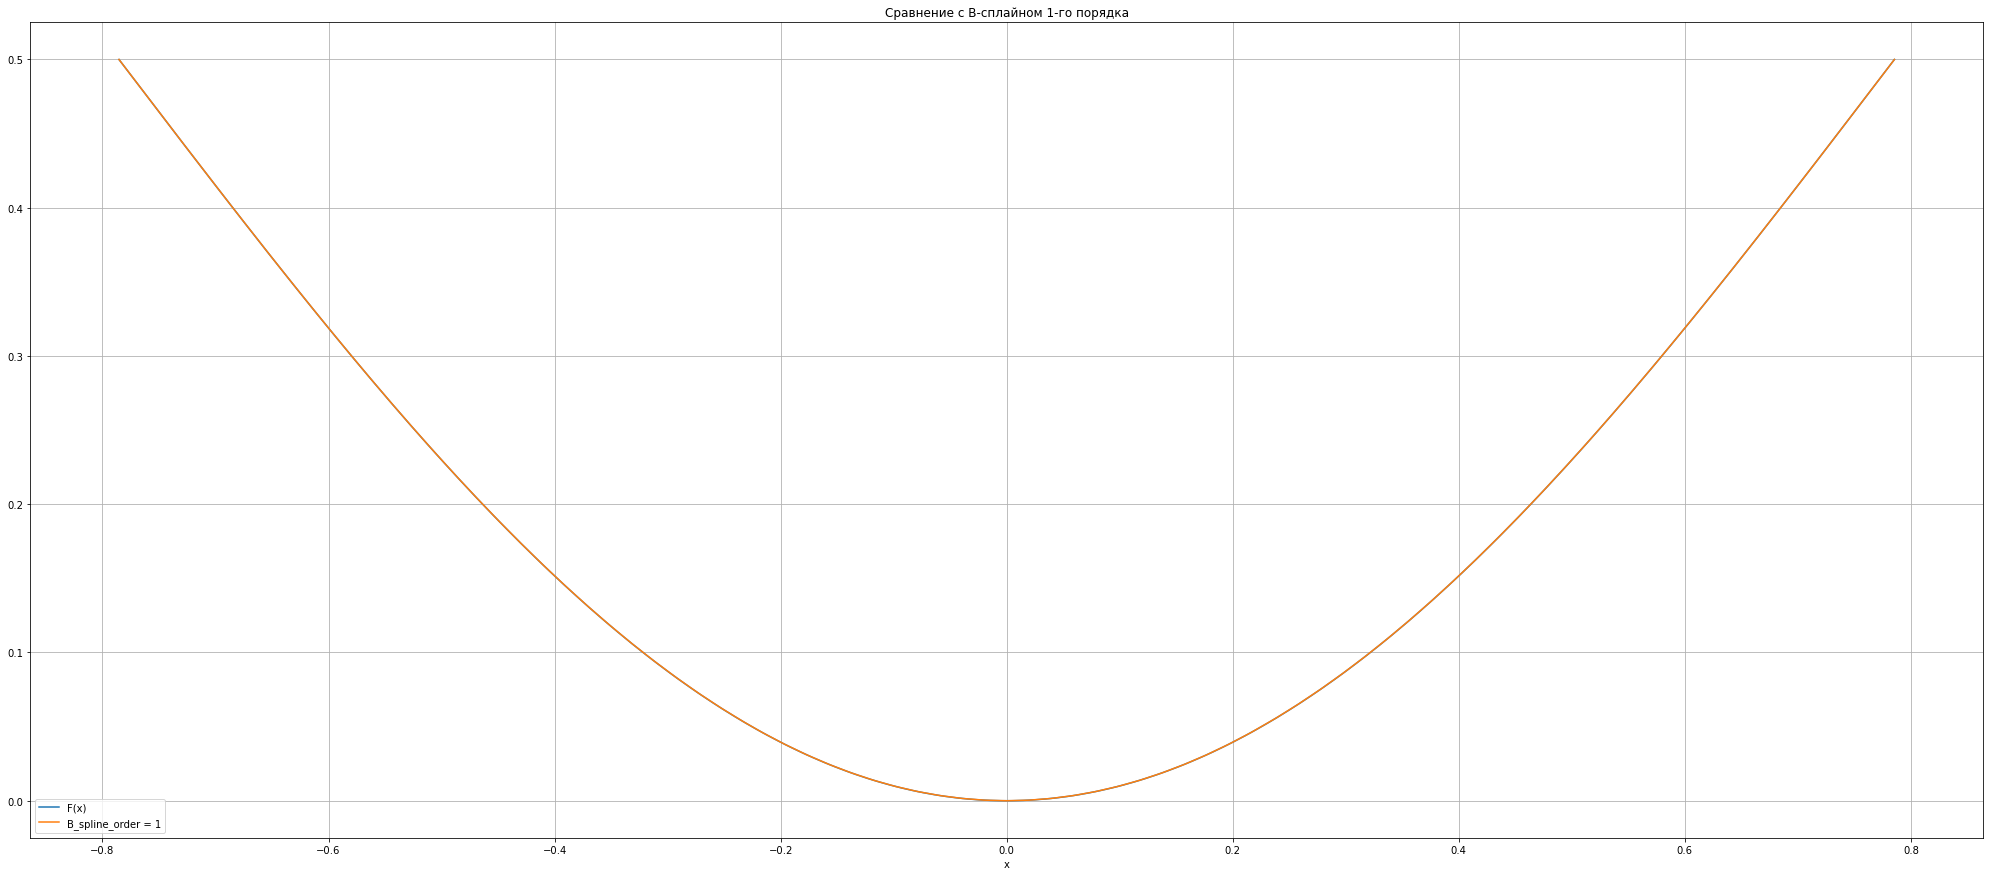

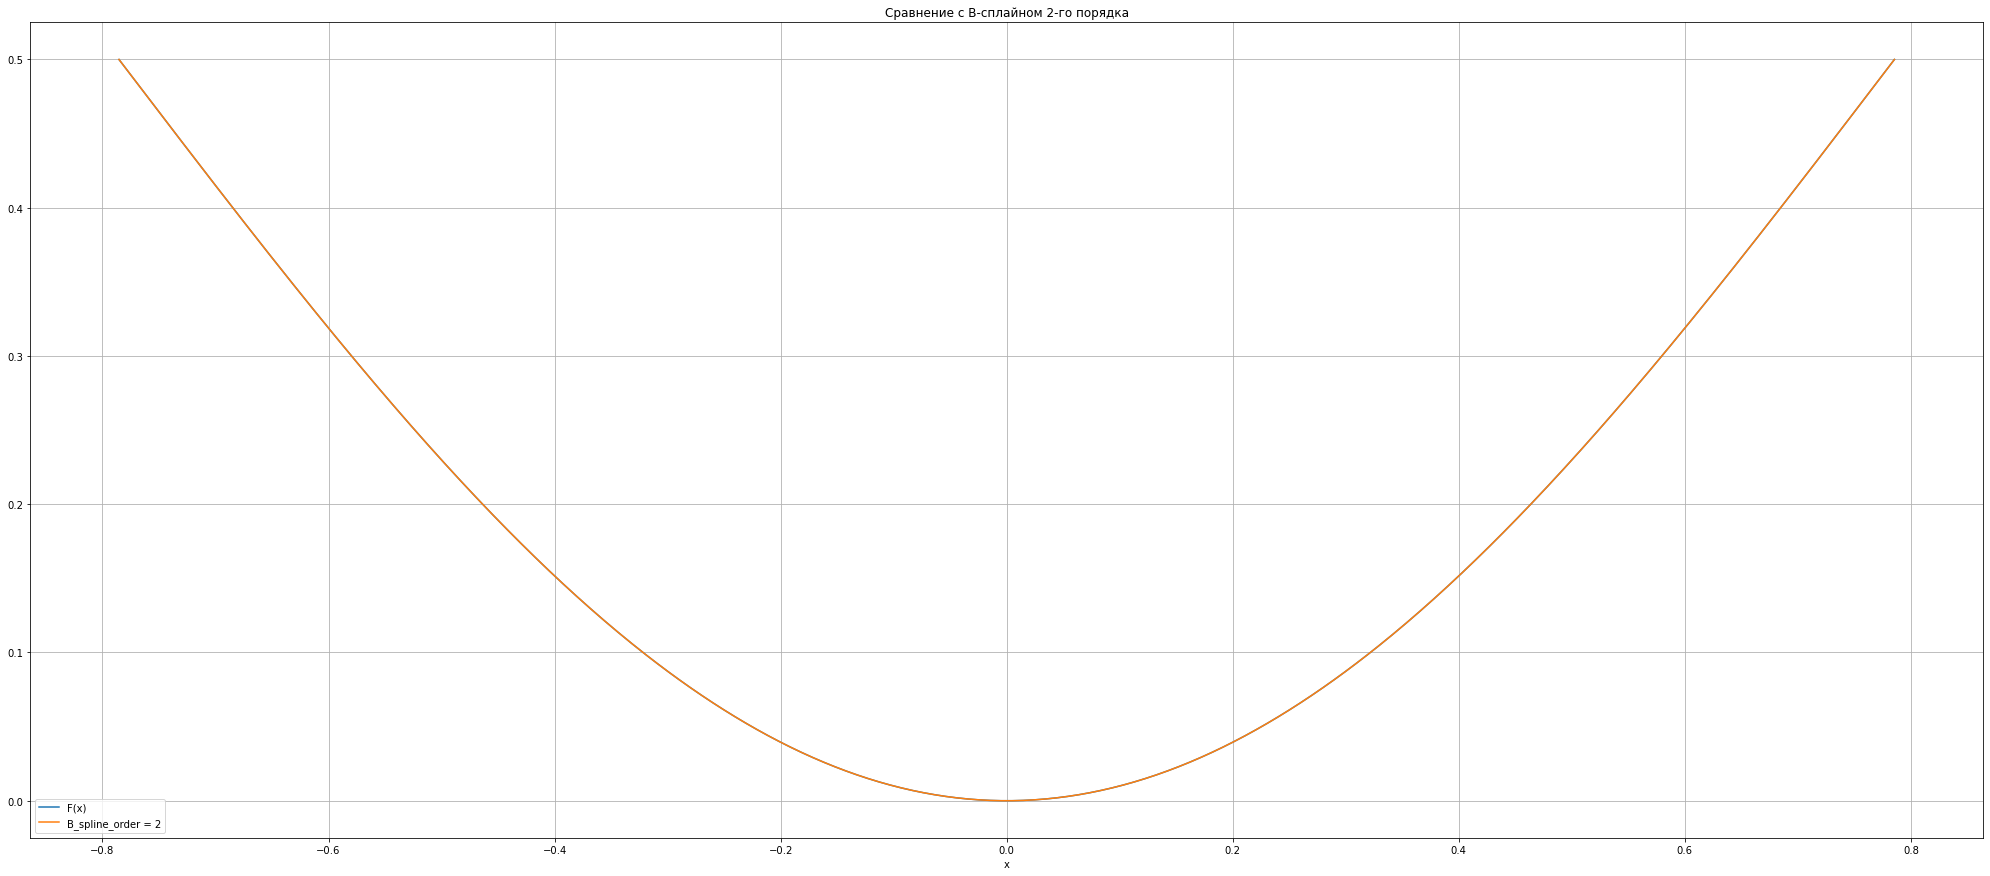

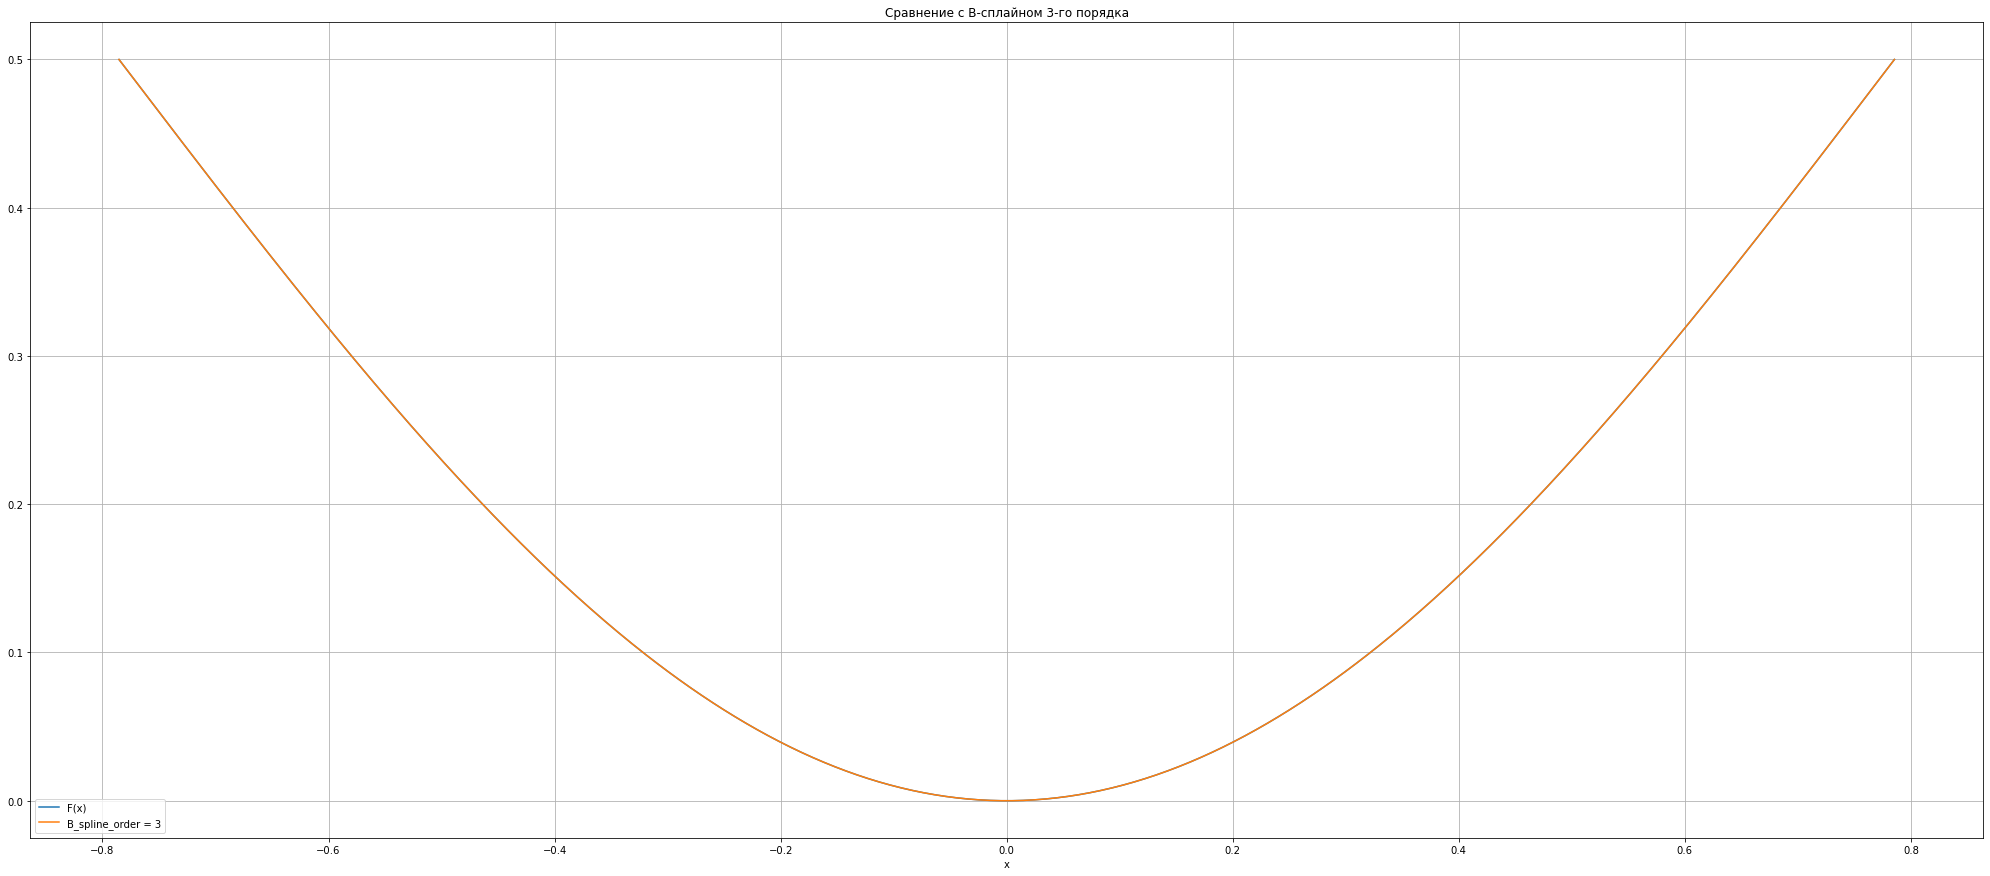

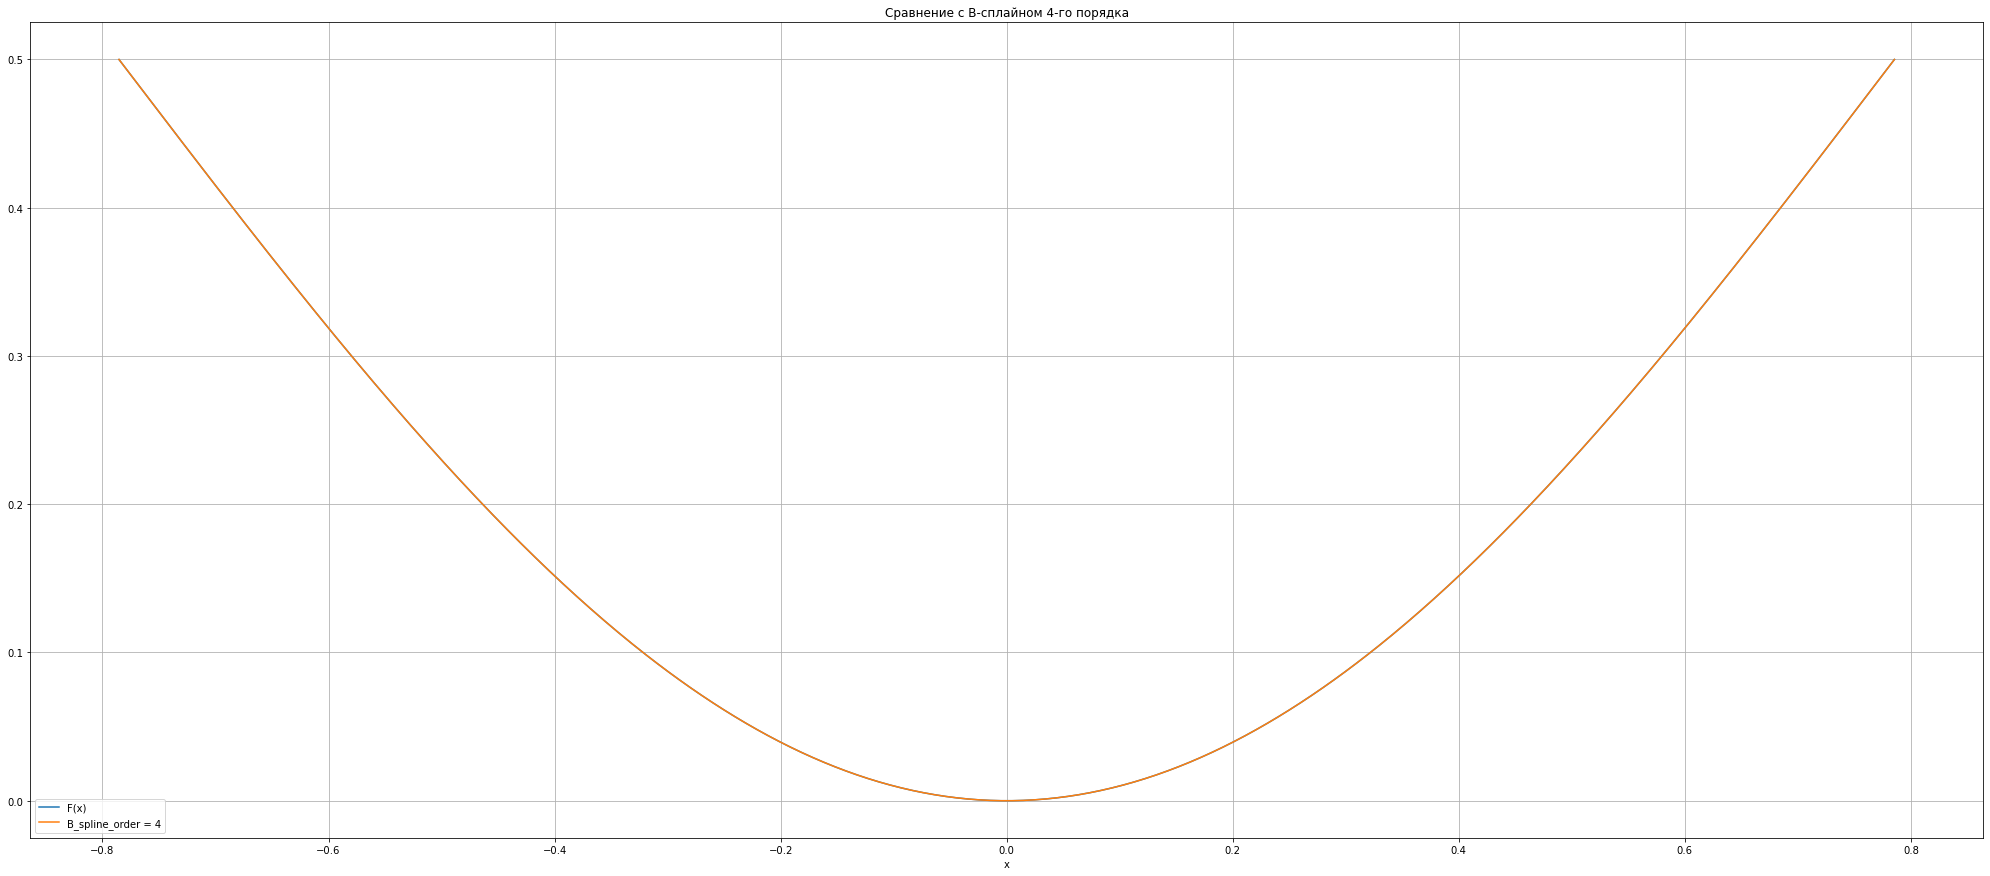

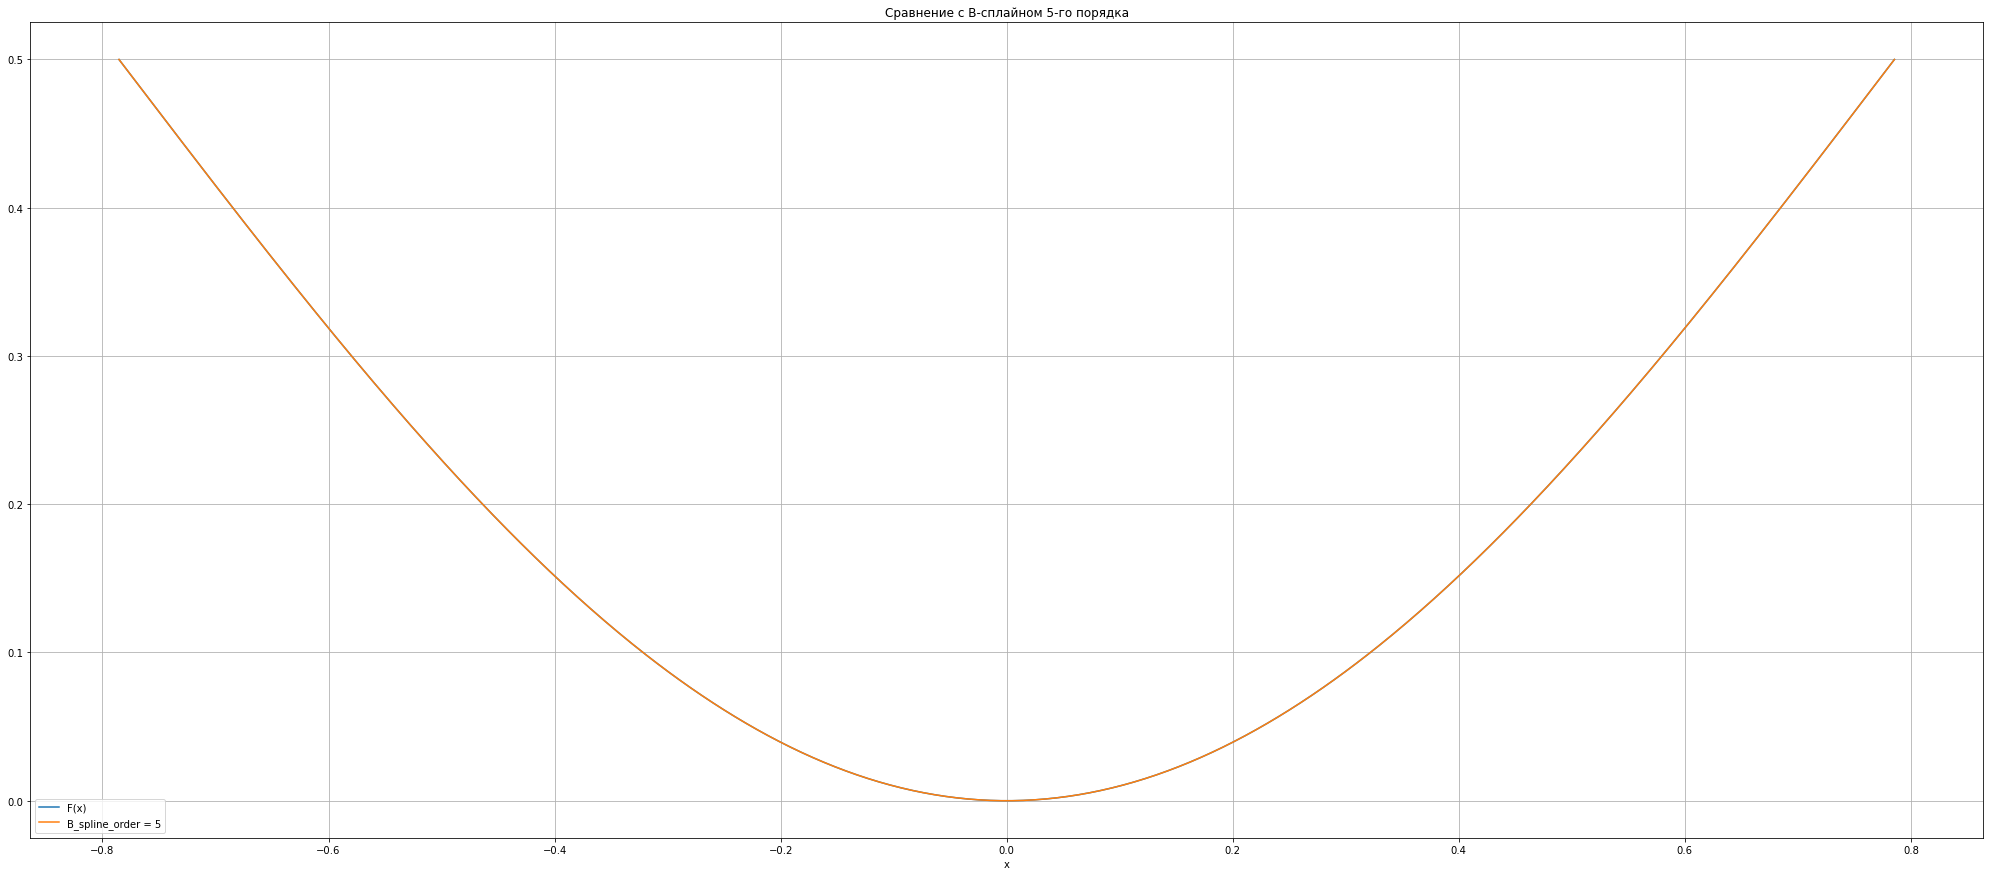

---------------------------------------------------------------------------------------------------------
Оценка погрешности аппроксимации функции в зависимости от степени сплайна. Попытка установить приближенную зависимость. Крайние условия плохо описываются.


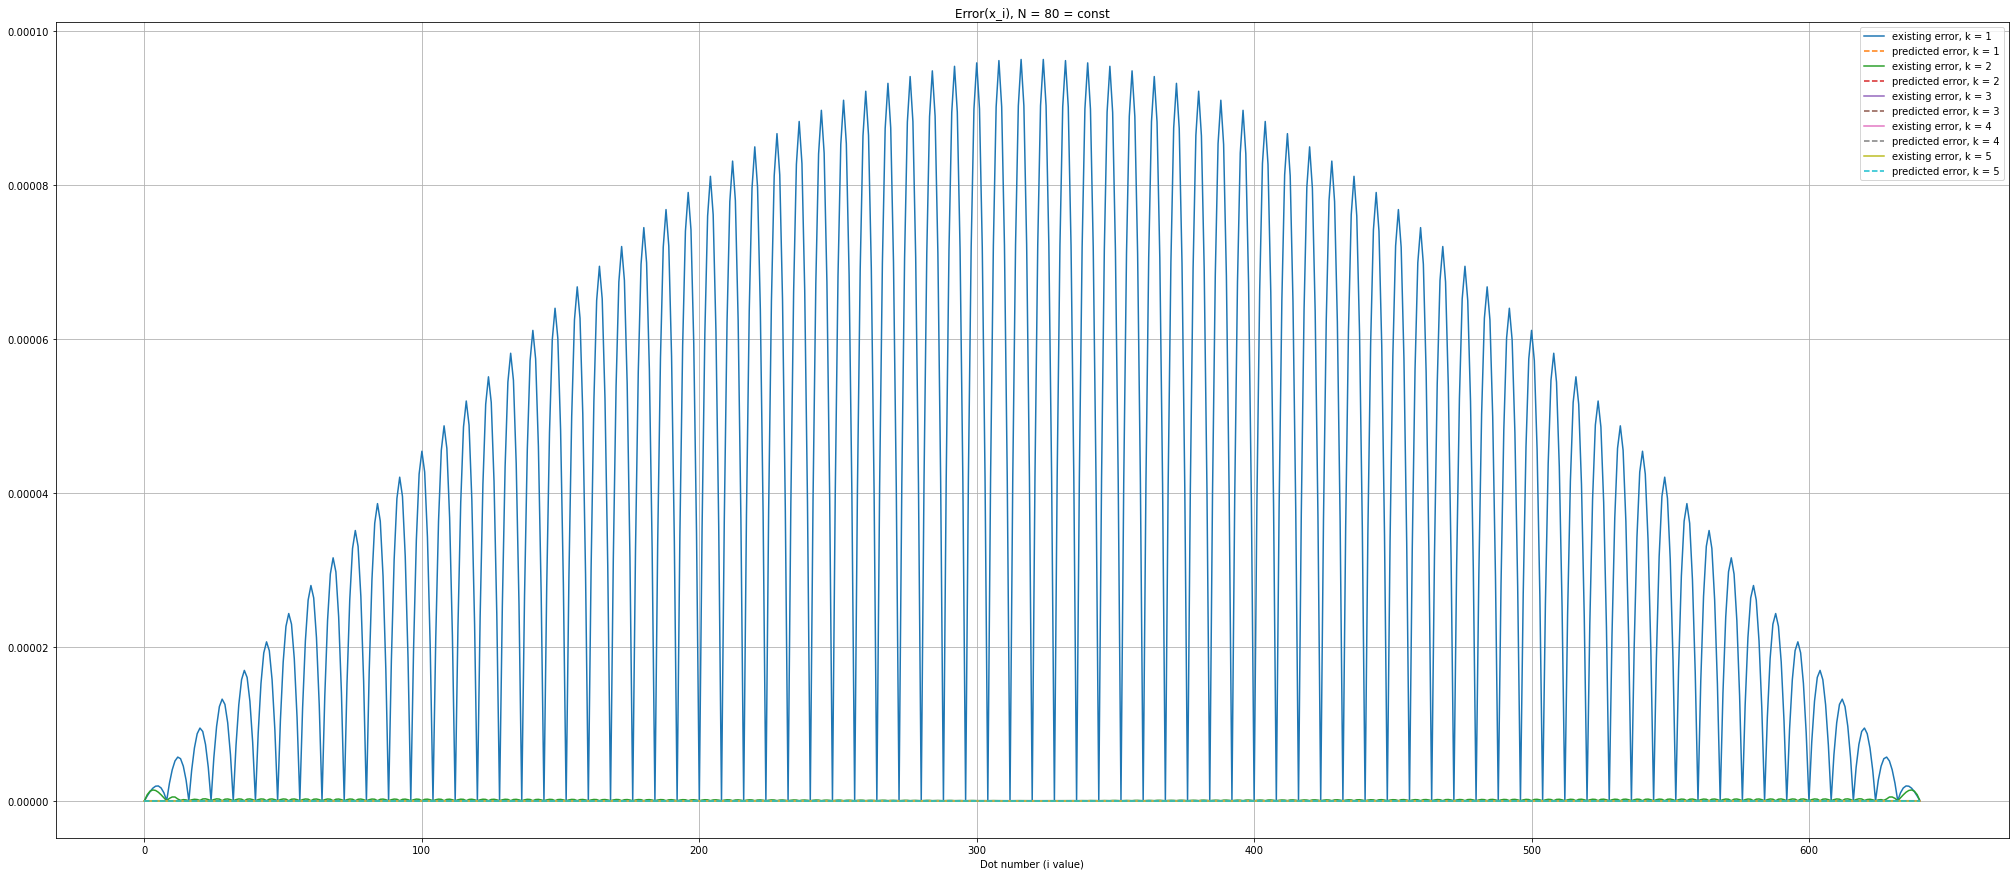

In [26]:
for N in number_partions:
    print("//////////////////////////////////////////////////"*3)
    print("\n\n", "\t"*5, "Количество узлов интерполяции N = ", N, end='\n\n')
    # Create Spline
    xdata = [x_spline(i) for i in range(N + 1)]
    ydata = list(map(lambda x: F(x), xdata))
    x = [x_value(i) for i in range(8*N + 1)]
    y = list(map(lambda x: F(x), x))
    # Dictionary for storage B-splines
    diction = {}
    diction['x'] = [x_value(i) for i in range(8*N + 1)]
    diction['F(x)'] = list(map(lambda x: F(x), x))  
    
    for order in range(1, 6):
        approx_spline = splineInterp(xdata, ydata, order=order + 1)
        diction["B_spline_order = " + str(order)] = list(map(lambda x_i: splineValue(x_i, approx_spline), x))
        diction["error_order = " + str(order)] = [abs(y[i] - diction["B_spline_order = " + str(order)][i]) for i in range(8*N + 1)]
        # Для оценки формулы погрешности создадим списки, хранящие предполагаемое теоретическое отклонение их засунев в словарь theoretical_estimate
        theoretical_estimate['estimation deviate k = ' + str(order)] = [teor_estimate(x[i], order, N) for i in range(8*N + 1)]
        # Вывод на экран наибольшей погрешноти 
        print("Max error in B-spline (if order =", order, ")\t =", max(diction["error_order = " + str(order)]), '\t i = ', diction["error_order = " + str(order)].index(max(diction["error_order = " + str(order)])) )
        
        estimate["k = " + str(order)][number_partions.index(N)] = max(diction["error_order = " + str(order)])
        
    dataframe = pd.DataFrame(diction)
    display(HTML(dataframe.to_html()))

    %matplotlib inline
    plt.rcParams["figure.figsize"] = (35,15)
    dataframe.plot(x='x', y=['F(x)', 'B_spline_order = 1'], title="Сравнение с B-сплайном 1-го порядка", grid=True, subplots=False)
    dataframe.plot(x='x', y=['F(x)', 'B_spline_order = 2'], title="Сравнение с B-сплайном 2-го порядка", grid=True, subplots=False)
    dataframe.plot(x='x', y=['F(x)', 'B_spline_order = 3'], title="Сравнение с B-сплайном 3-го порядка", grid=True, subplots=False)
    dataframe.plot(x='x', y=['F(x)', 'B_spline_order = 4'], title="Сравнение с B-сплайном 4-го порядка", grid=True, subplots=False)
    dataframe.plot(x='x', y=['F(x)', 'B_spline_order = 5'], title="Сравнение с B-сплайном 5-го порядка", grid=True, subplots=False)
    plt.show()
    
    
    print('---------------------------------------------------------------------------------------------------------', 
          'Оценка погрешности аппроксимации функции в зависимости от степени сплайна. Попытка установить приближенную зависимость. Крайние условия плохо описываются.', sep='\n')

    columns_errors_plot = None
    if not columns_errors_plot:
        columns_errors_plot = []
        for order in range(1, 6):
            columns_errors_plot.append('existing error, k = ' + str(order))
            columns_errors_plot.append('predicted error, k = ' + str(order))
    
    
    
    
    errors_dataframe = pd.DataFrame(list(zip(diction['error_order = 1'], theoretical_estimate['estimation deviate k = 1'],
                                             diction['error_order = 2'], theoretical_estimate['estimation deviate k = 2'],
                                             diction['error_order = 3'], theoretical_estimate['estimation deviate k = 3'],
                                             diction['error_order = 4'], theoretical_estimate['estimation deviate k = 4'],
                                             diction['error_order = 5'], theoretical_estimate['estimation deviate k = 5'])),
                                    columns=columns_errors_plot)
                                   
    errors_dataframe.plot(title='Error(x_i), N = ' + str(N) + ' = const', xlabel='Dot number (i value)', grid=True, kind='line', style=['-', '--']*5)
    plt.show()
    #Более подробная информация 
    #display(HTML(errors_dataframe.to_html()))
    

//////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////
Отношение максимальных отклонений для 2-х соседних разбиений


,k = 1,k = 2,k = 3,k = 4,k = 5
10/20,3.956862,7.878408,31.566885,29.468999,121.417162
20/40,3.989208,7.969770,27.954194,31.374810,126.533401
40/80,3.997301,7.992453,16.009246,31.843784,127.615262


<AxesSubplot:title={'center':'Отношение максимальных отклонений для 2-х соседних разбиений для различных k'}, ylabel='Pair of splits'>

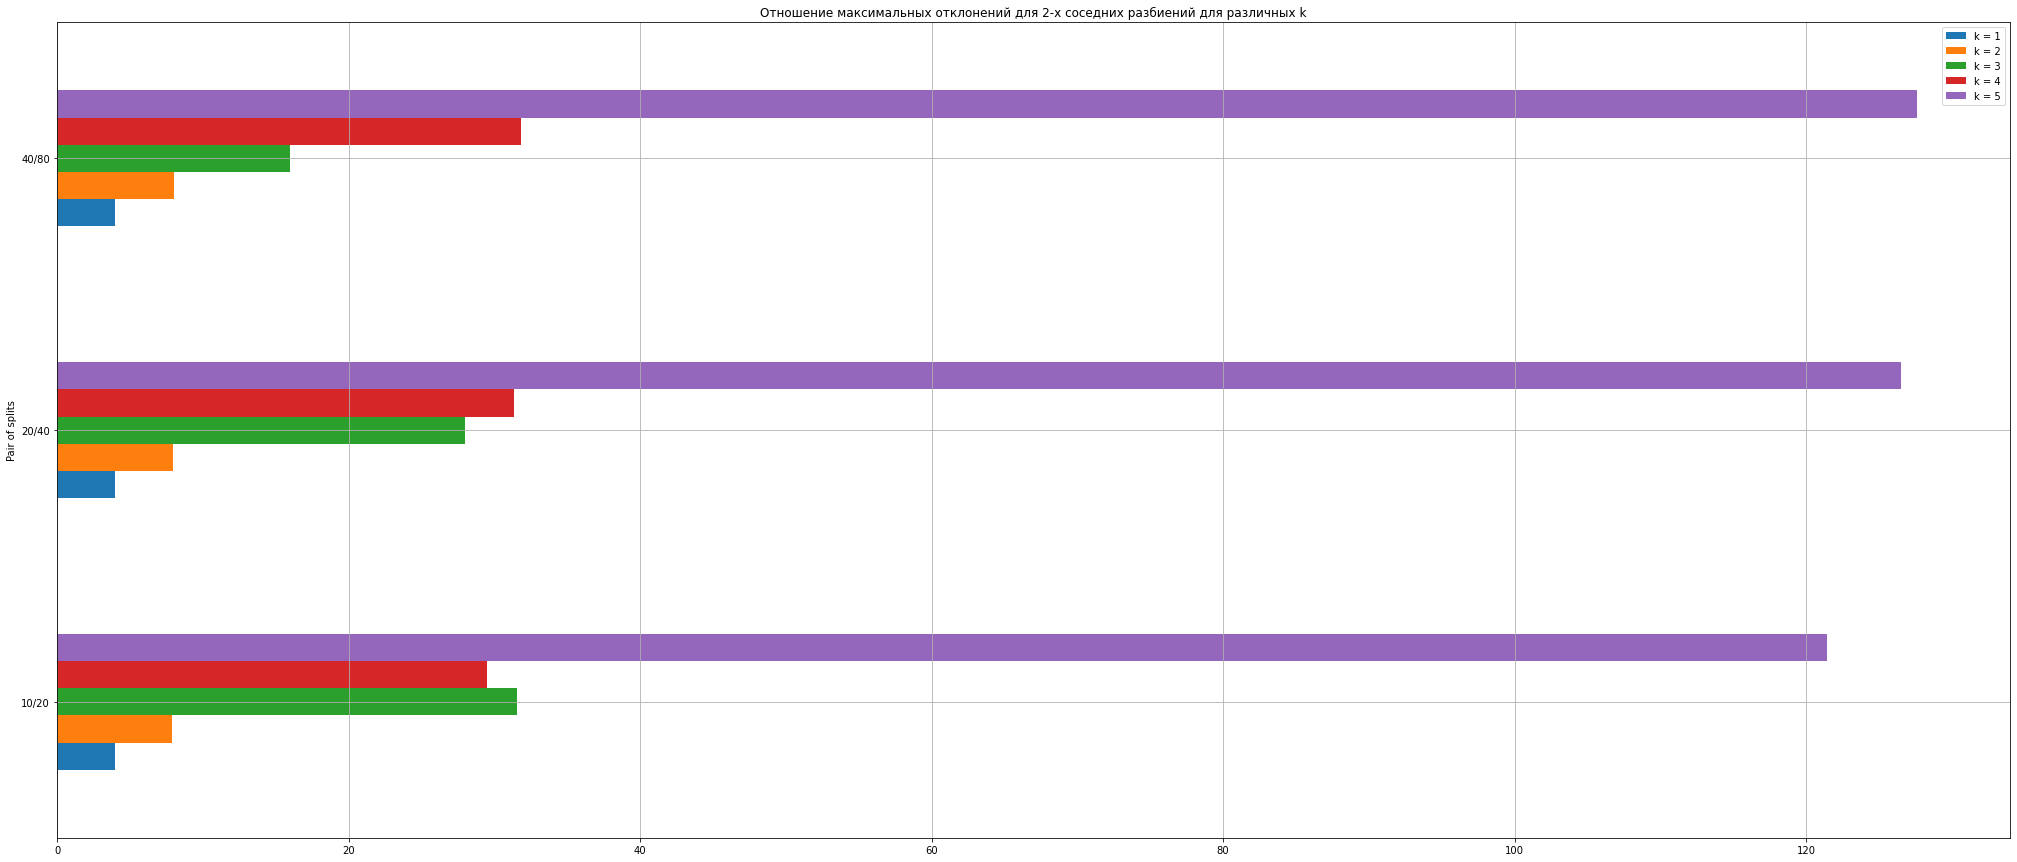

In [27]:
print("//////////////////////////////////////////////////"*3)
estimate_analys = {}
for order in range(1, 6):
    for split_number in range(len(number_partions)):
        estimate_analys['k = ' + str(order)] = [ estimate['k = ' + str(order)][count]/estimate['k = ' + str(order)][count + 1] for count in range(len(number_partions) - 1)]

index_list = [( str(number_partions[i]) + '/' + str(number_partions[i + 1]) ) for i in range(len(number_partions) - 1)]
estimate_dataframe = pd.DataFrame(estimate_analys, index=index_list)
print('Отношение максимальных отклонений для 2-х соседних разбиений')
display(HTML(estimate_dataframe.to_html()))
estimate_dataframe.plot(grid=True, ylabel='Pair of splits', title='Отношение максимальных отклонений для 2-х соседних разбиений для различных k', kind='barh')

### В данном случае, увеличение отношения свидетельствует о том , что при увеличении порядка B-сплайна максимальное отклонение с ростом числа узлов интерполяции уменьшается

``` Малая выборка или нет внятной зависимости? ```
